In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


local
local
stop final relax at some point


stop final relax at some point


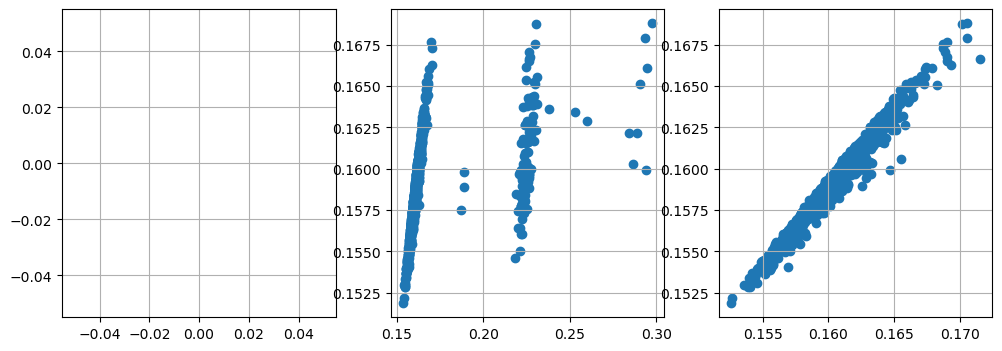

Generation 0, Trees 40, Best cost: 0.15186076, Est: 0.37965190, h: 3.875757


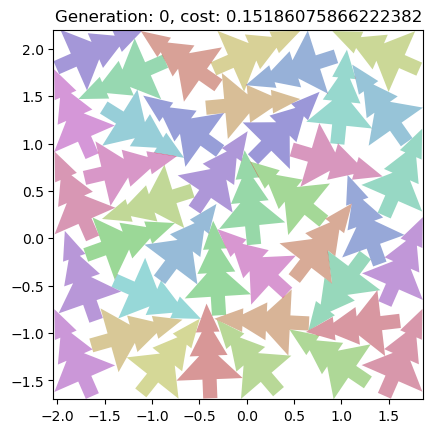

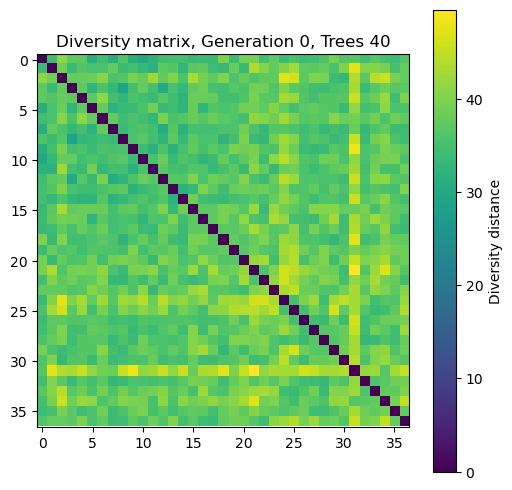

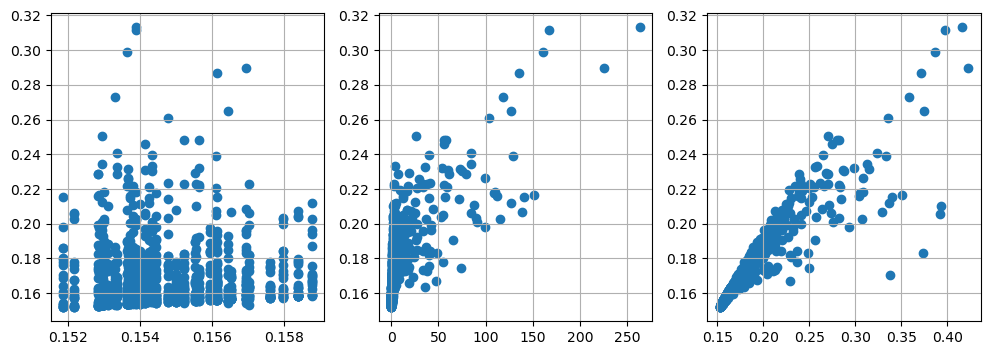

Generation 1, Trees 40, Best cost: 0.15185770, Est: 0.37964425, h: 3.875693


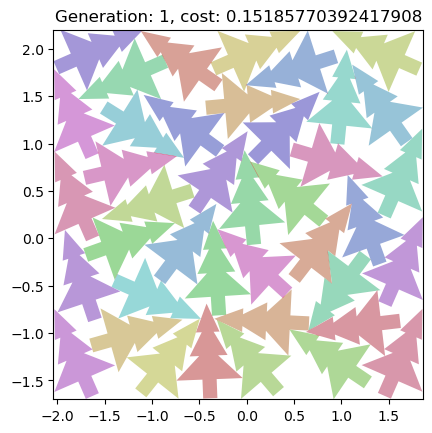

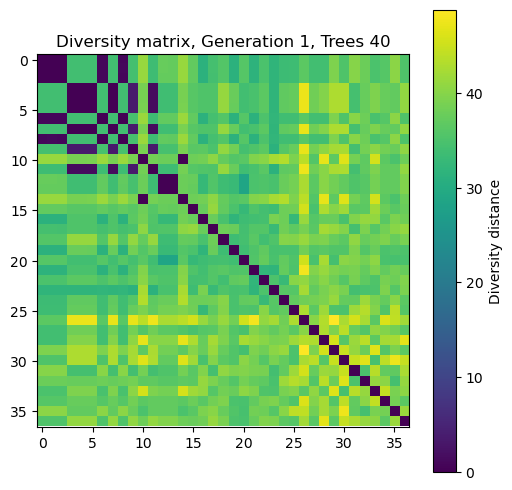

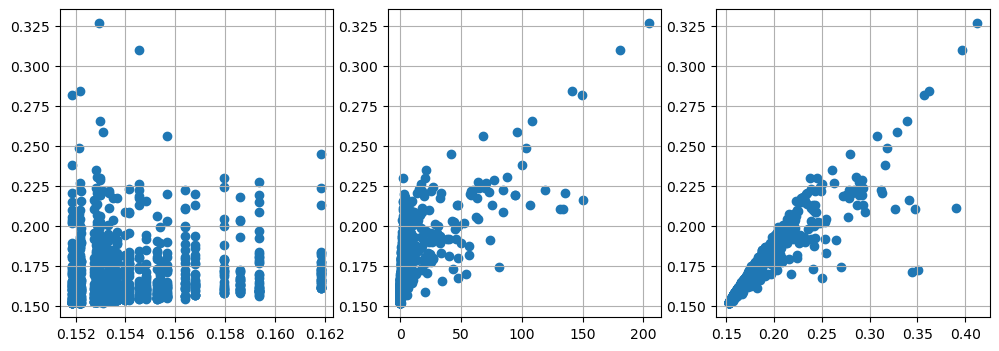

Generation 2, Trees 40, Best cost: 0.15175258, Est: 0.37938144, h: 3.873512


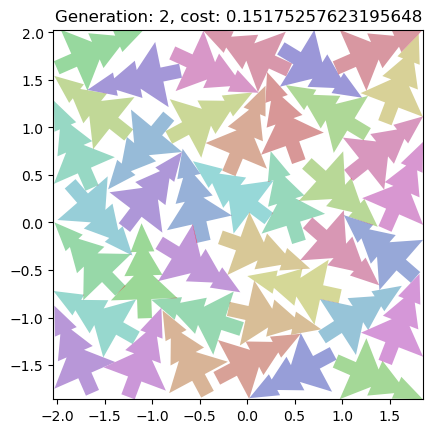

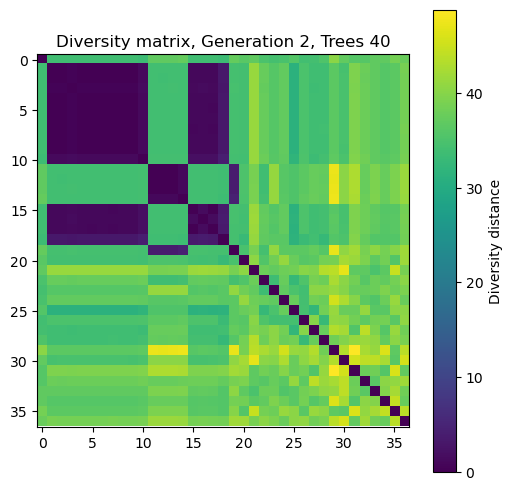

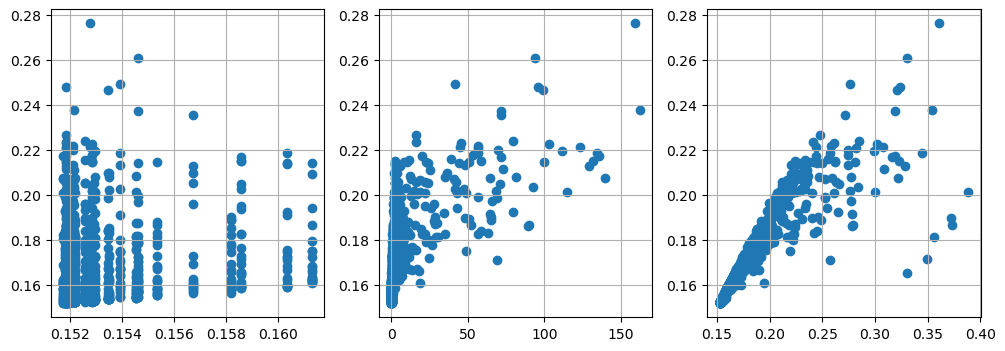

Generation 3, Trees 40, Best cost: 0.15172799, Est: 0.37931998, h: 3.872688


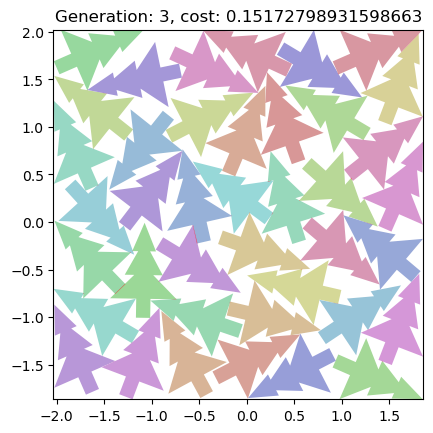

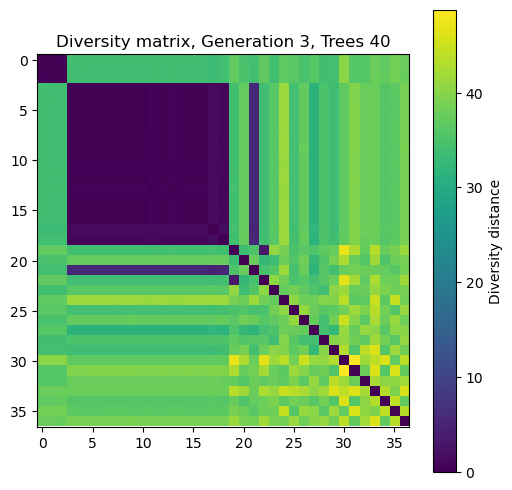

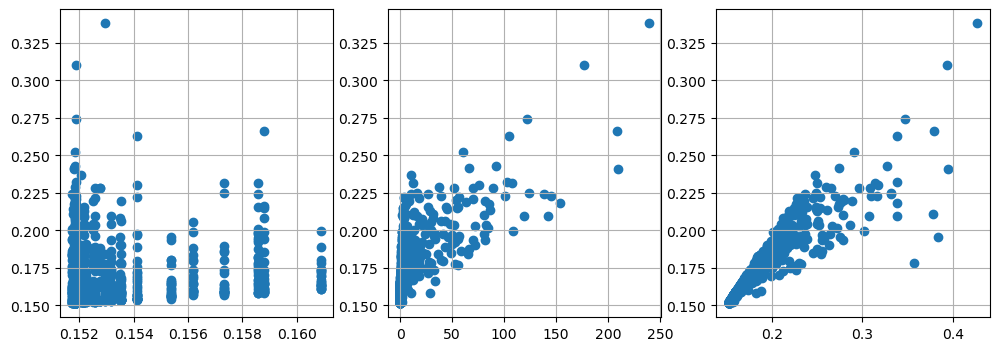

Generation 4, Trees 40, Best cost: 0.15144601, Est: 0.37861505, h: 3.869975


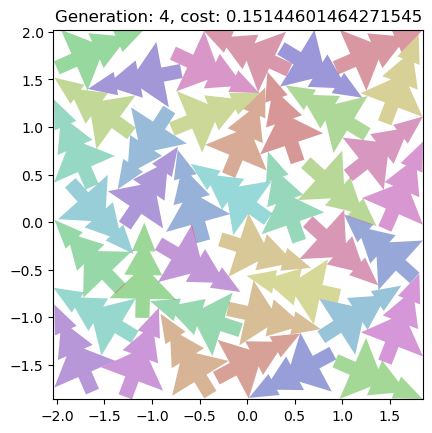

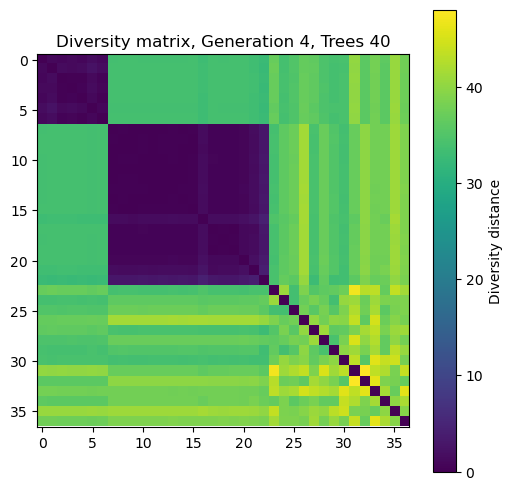

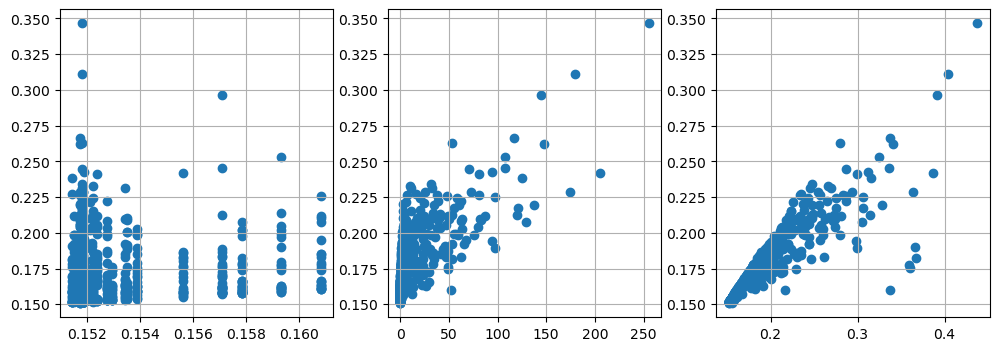

Generation 5, Trees 40, Best cost: 0.15069452, Est: 0.37673631, h: 3.864078


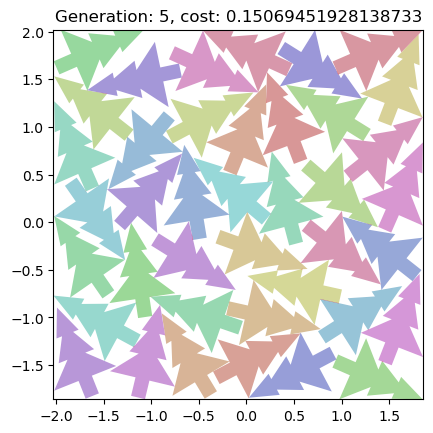

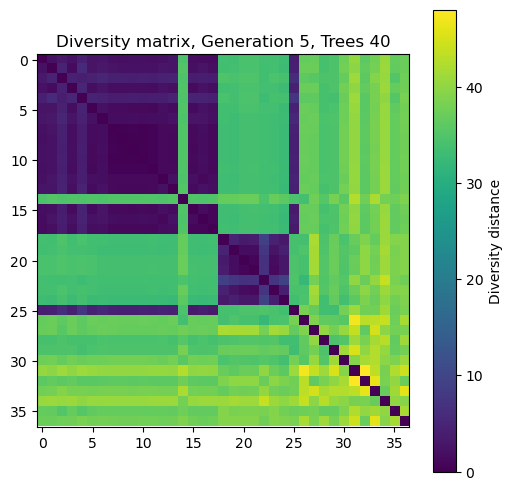

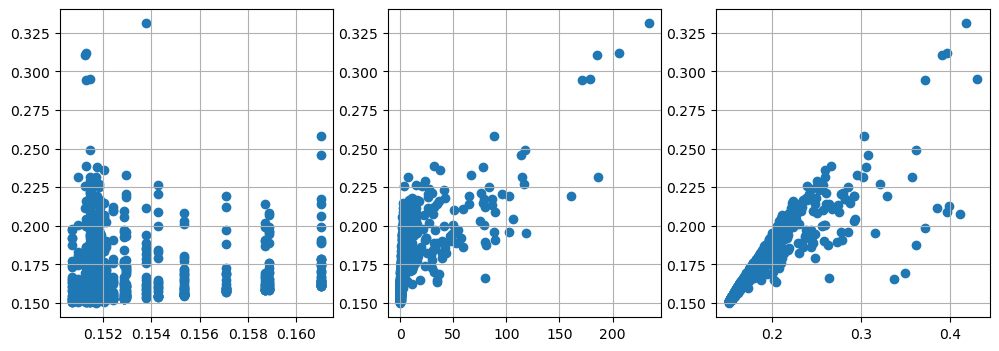

Generation 6, Trees 40, Best cost: 0.14980553, Est: 0.37451382, h: 3.850506


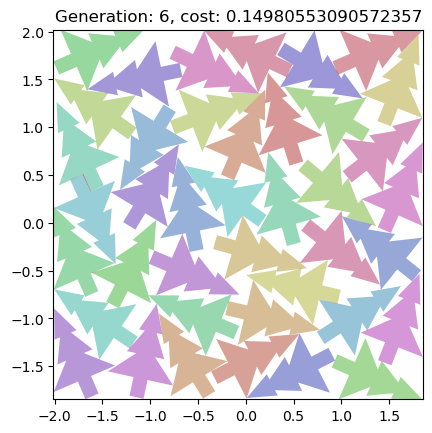

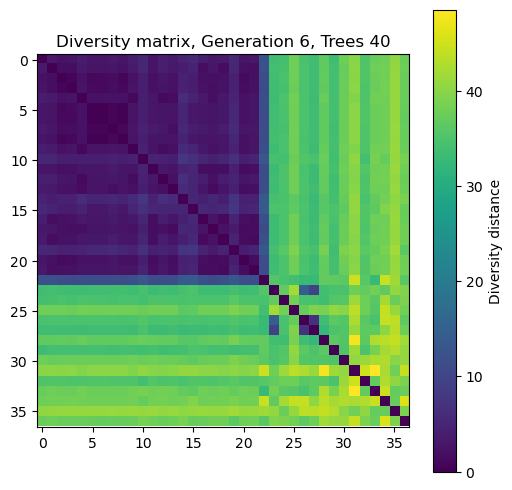

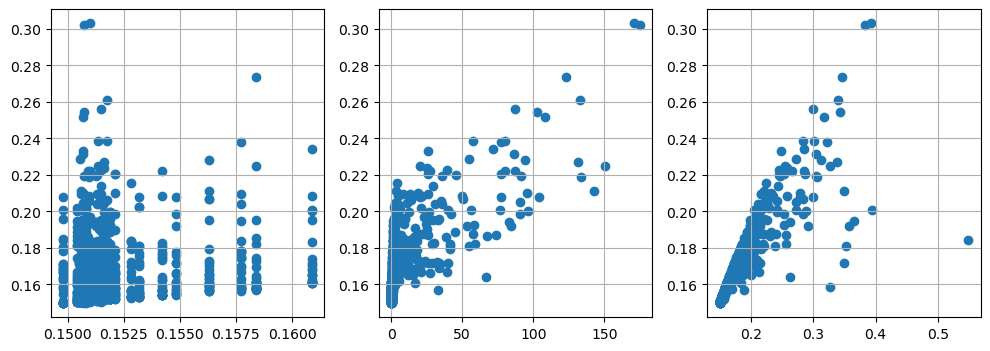

Generation 7, Trees 40, Best cost: 0.14968282, Est: 0.37420704, h: 3.850016


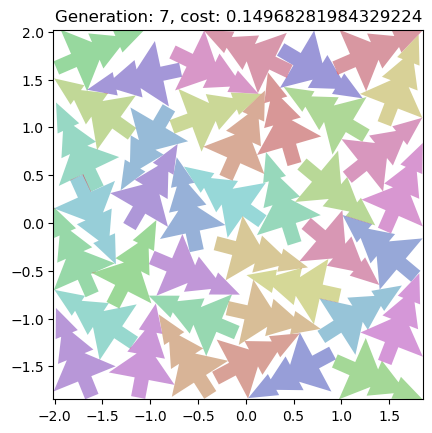

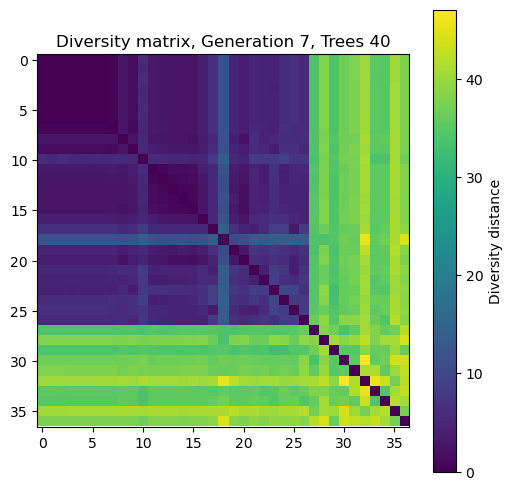

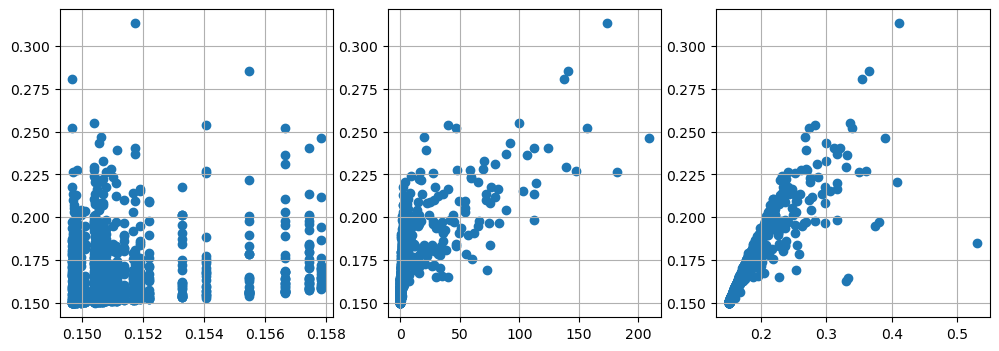

Generation 8, Trees 40, Best cost: 0.14961825, Est: 0.37404563, h: 3.850619


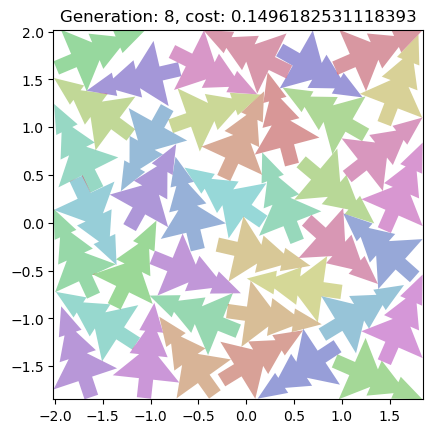

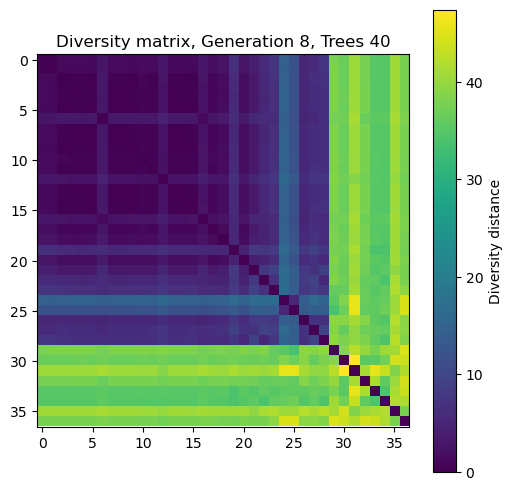

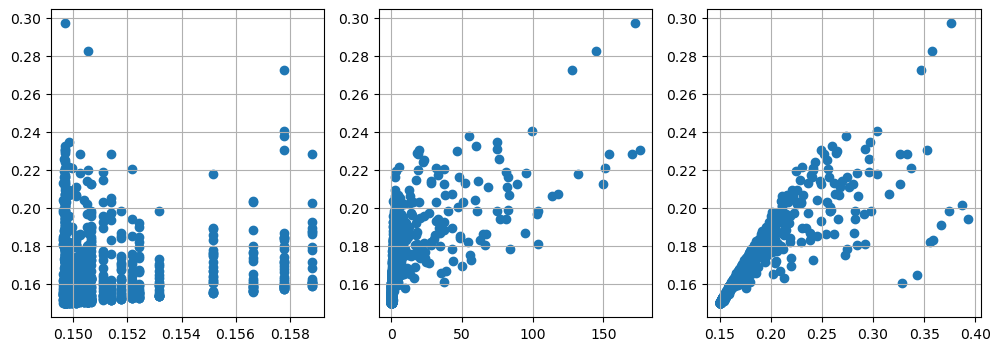

Generation 9, Trees 40, Best cost: 0.14956695, Est: 0.37391737, h: 3.850498


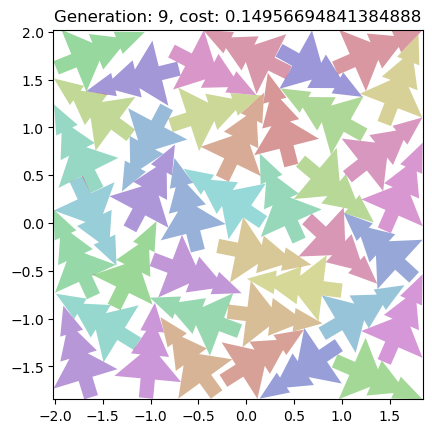

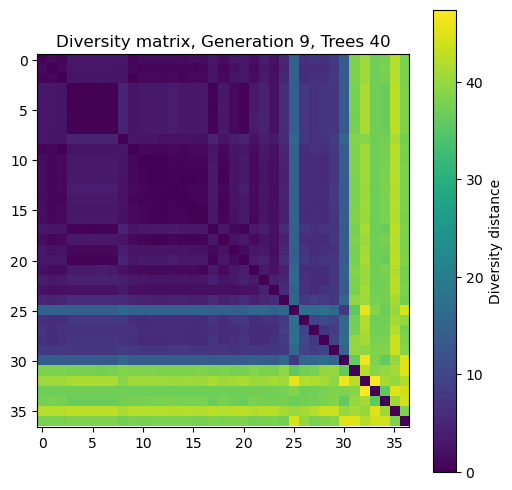

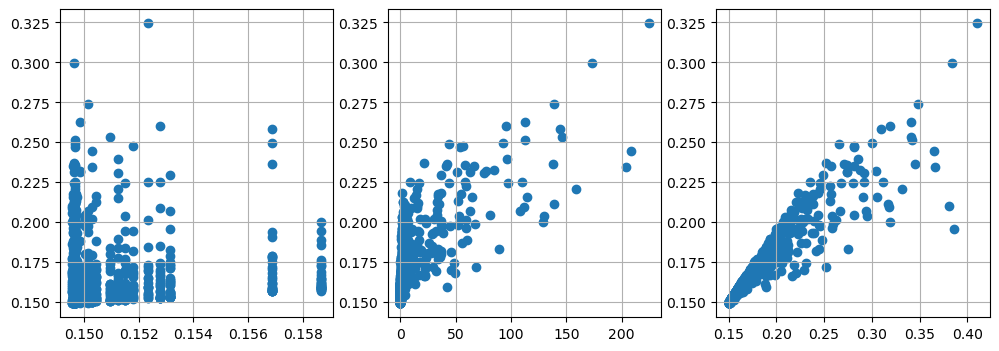

Generation 10, Trees 40, Best cost: 0.14919505, Est: 0.37298760, h: 3.844946


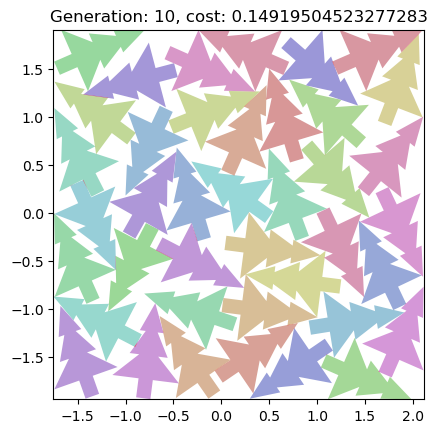

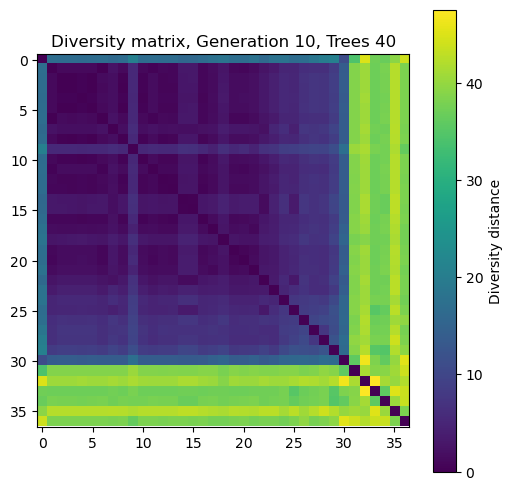

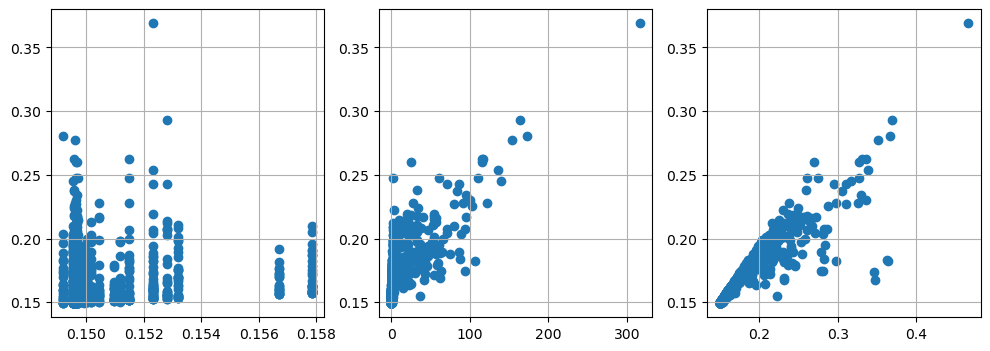

Generation 11, Trees 40, Best cost: 0.14918143, Est: 0.37295356, h: 3.845055


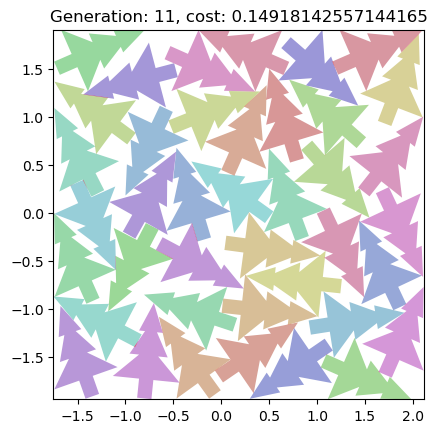

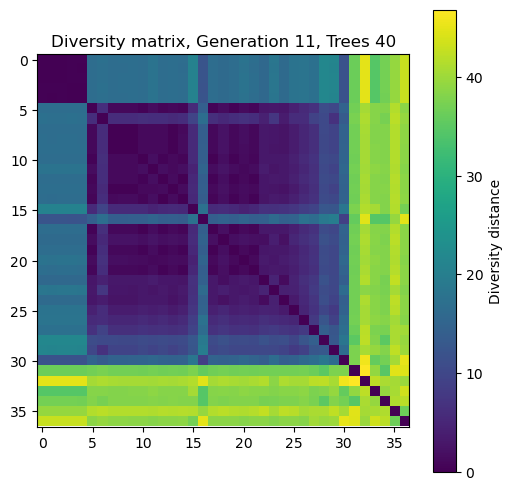

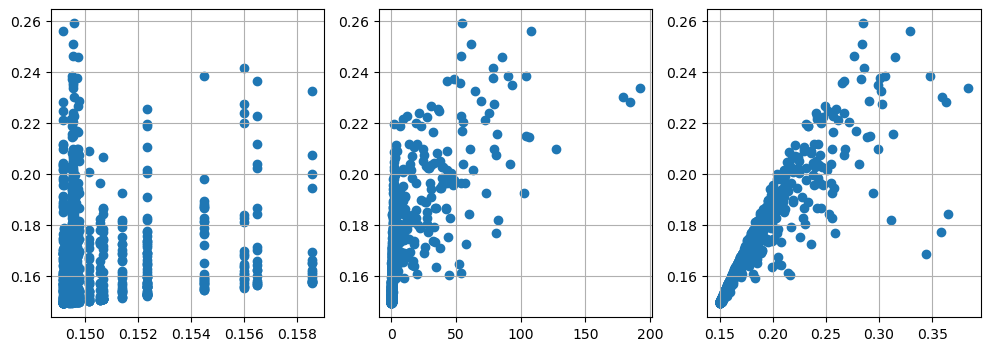

Generation 12, Trees 40, Best cost: 0.14912069, Est: 0.37280173, h: 3.843751


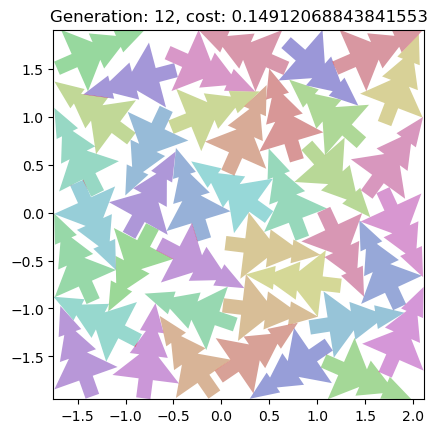

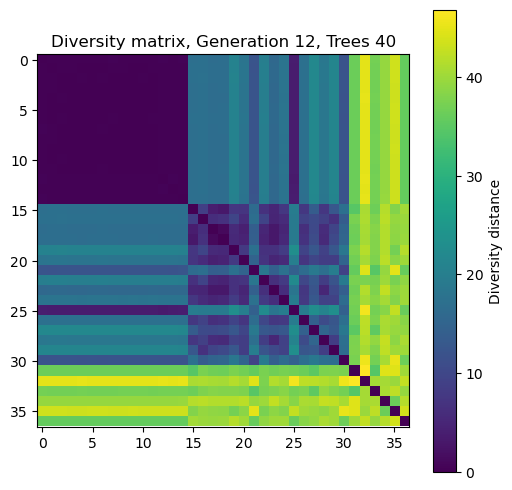

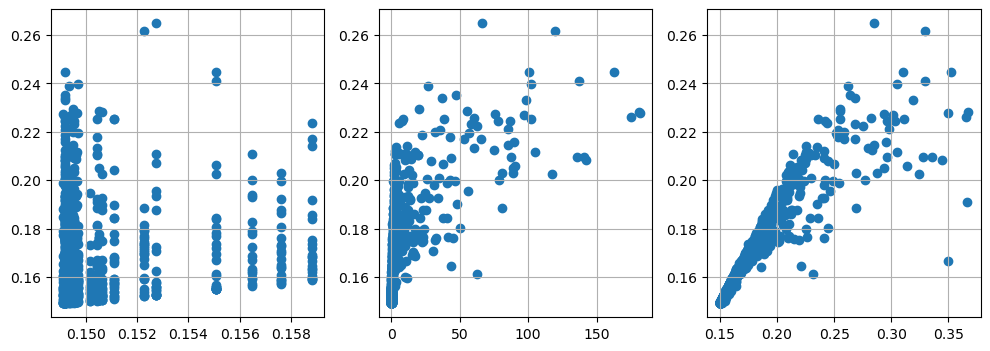

Generation 13, Trees 40, Best cost: 0.14909169, Est: 0.37272923, h: 3.843867


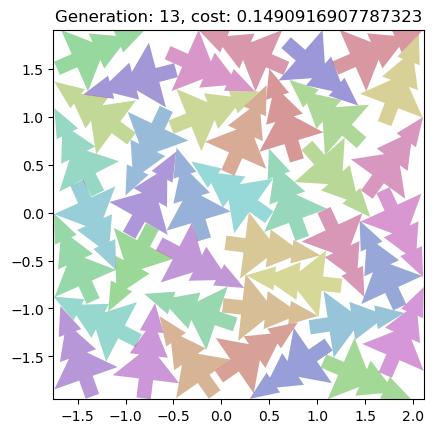

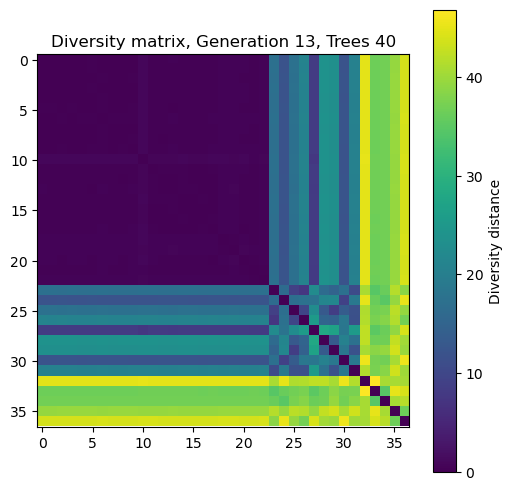

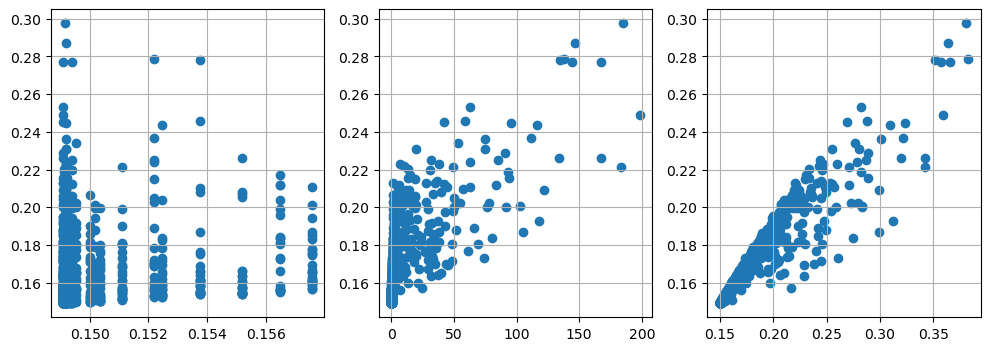

Generation 14, Trees 40, Best cost: 0.14905816, Est: 0.37264540, h: 3.842488


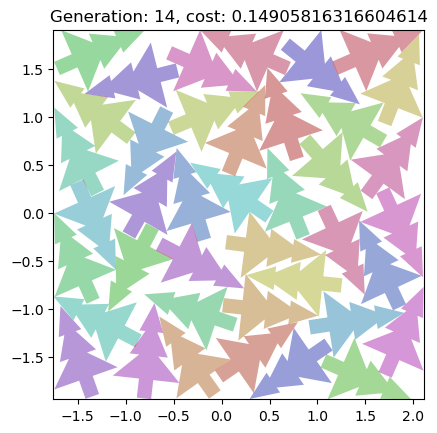

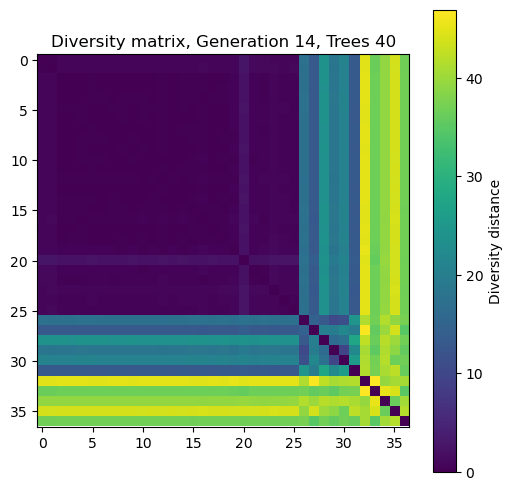

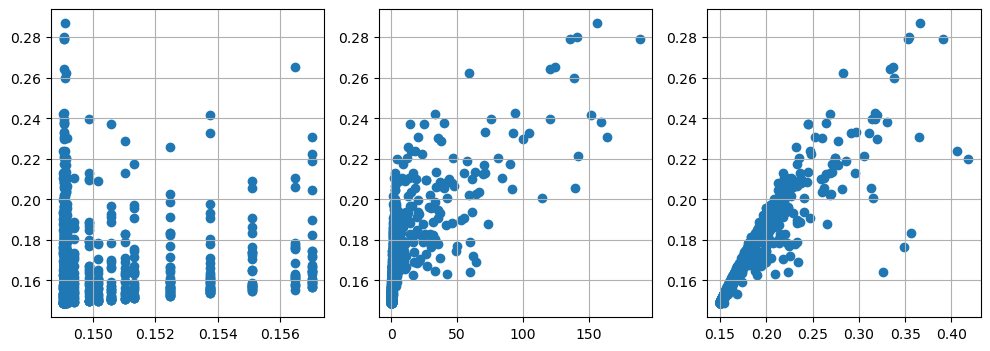

Generation 15, Trees 40, Best cost: 0.14875968, Est: 0.37189920, h: 3.839079


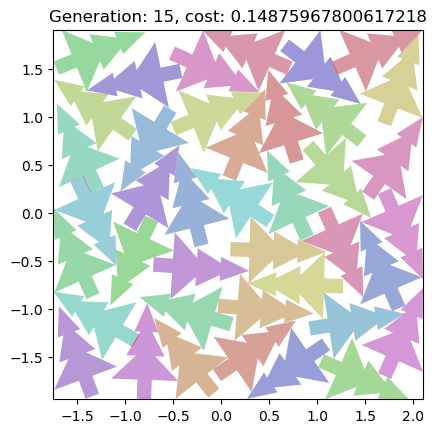

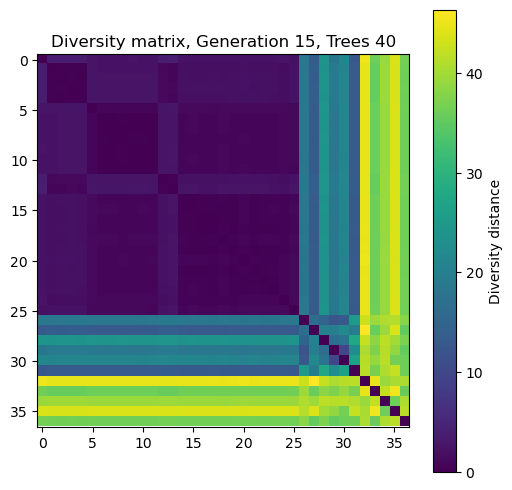

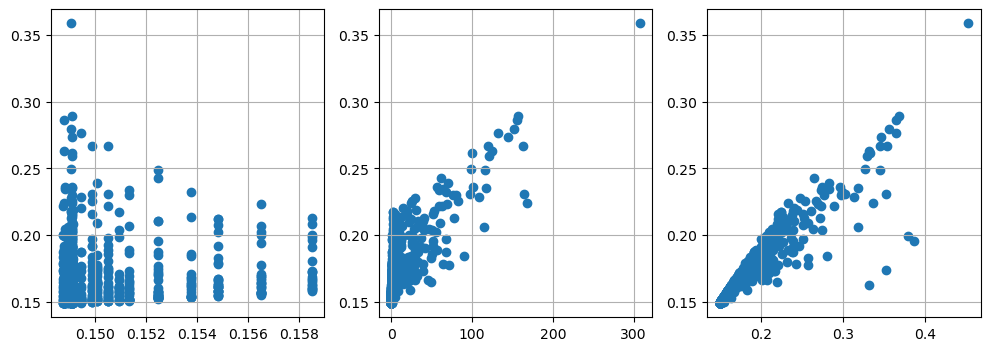

Generation 16, Trees 40, Best cost: 0.14873852, Est: 0.37184629, h: 3.838501


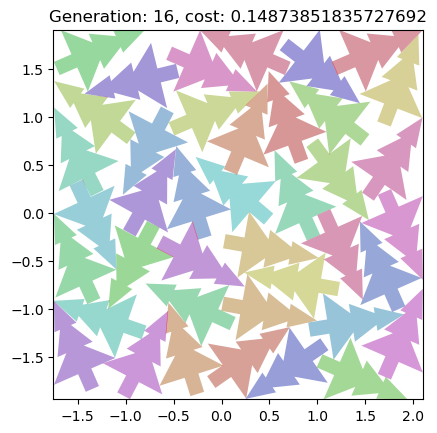

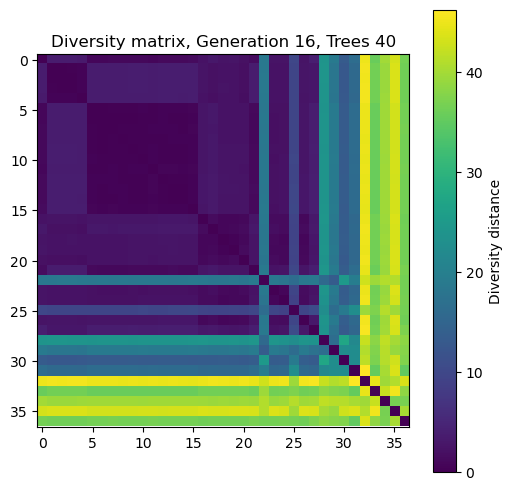

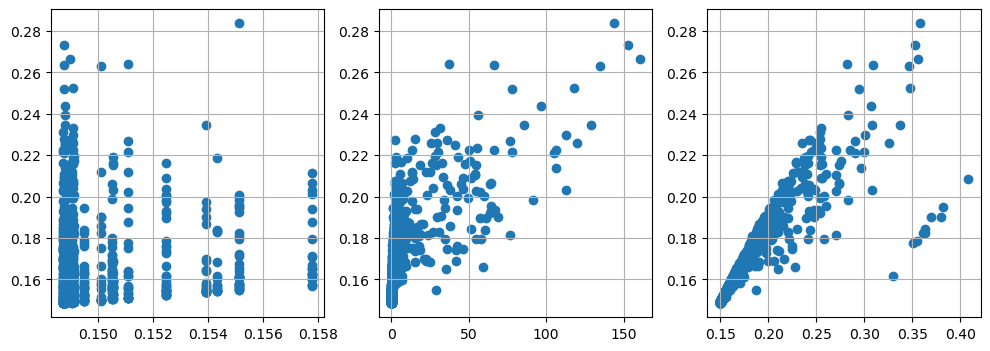

Generation 17, Trees 40, Best cost: 0.14848280, Est: 0.37120700, h: 3.835868


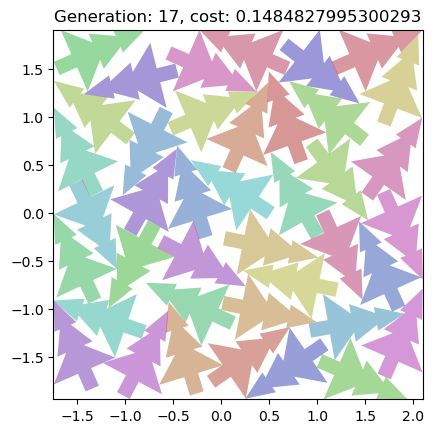

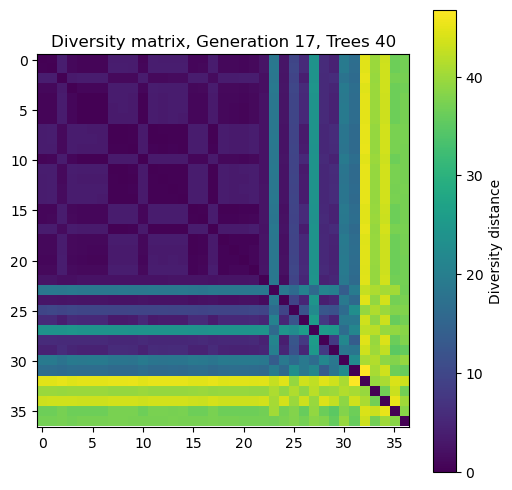

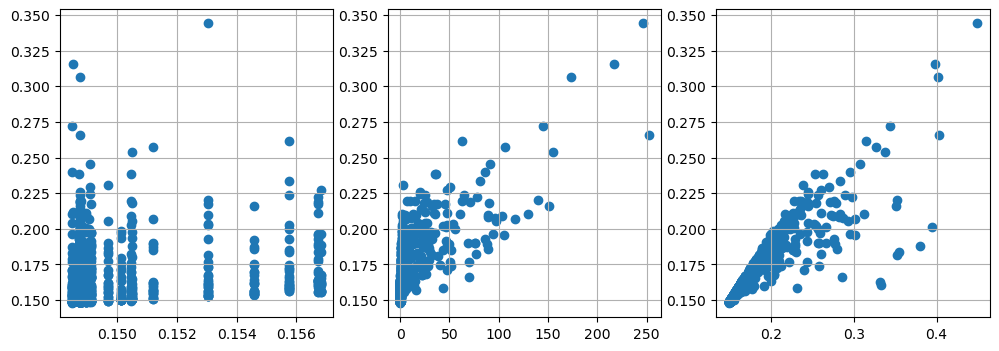

Generation 18, Trees 40, Best cost: 0.14779927, Est: 0.36949818, h: 3.828390


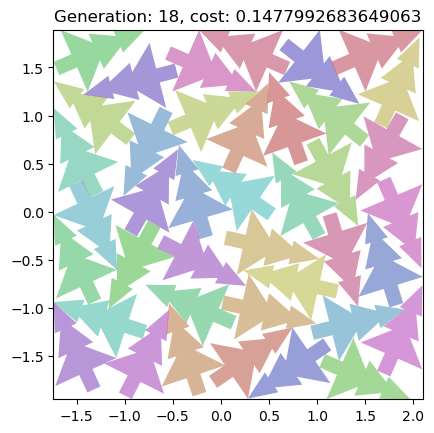

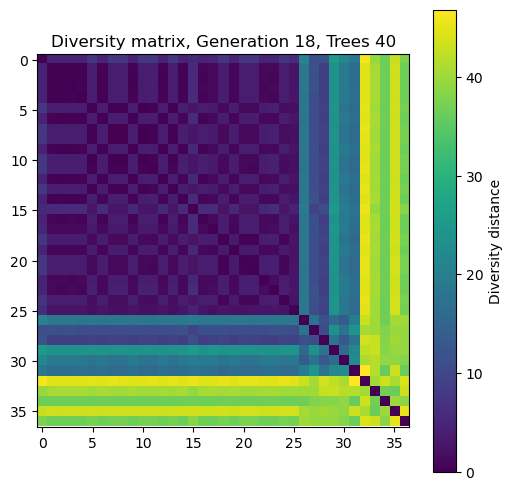

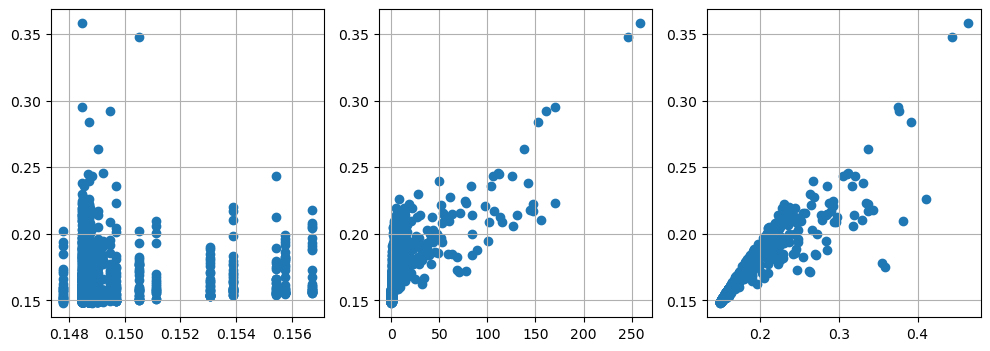

Generation 19, Trees 40, Best cost: 0.14779630, Est: 0.36949077, h: 3.828374


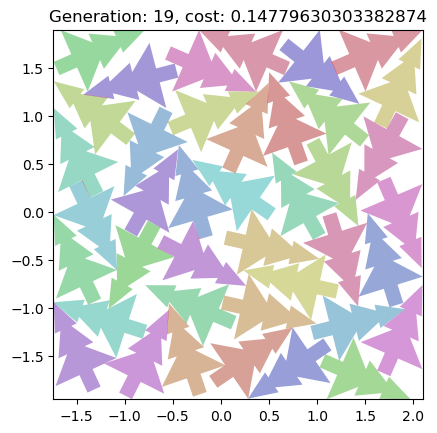

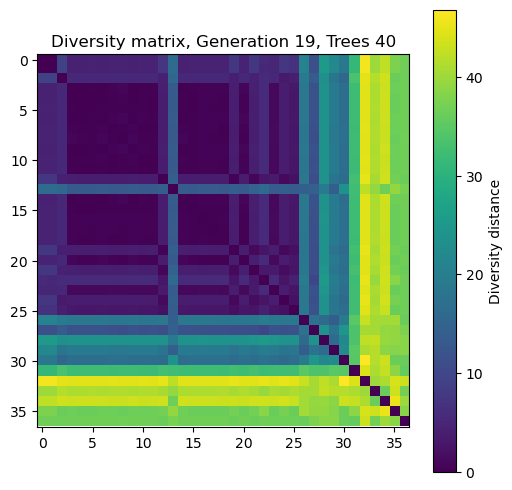

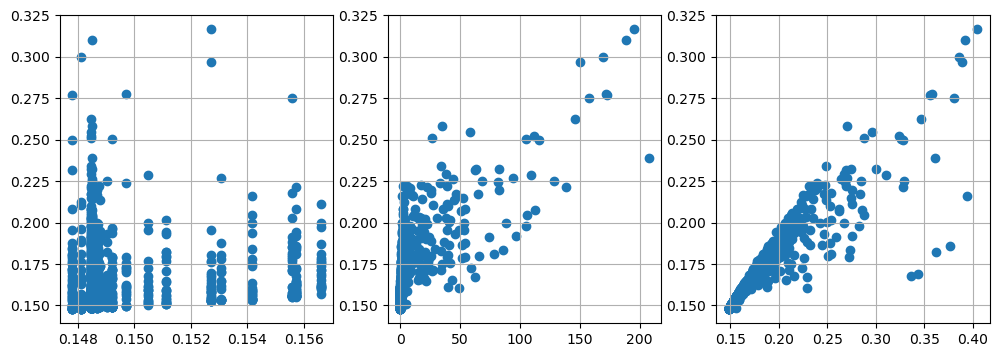

Generation 20, Trees 40, Best cost: 0.14763509, Est: 0.36908772, h: 3.825334


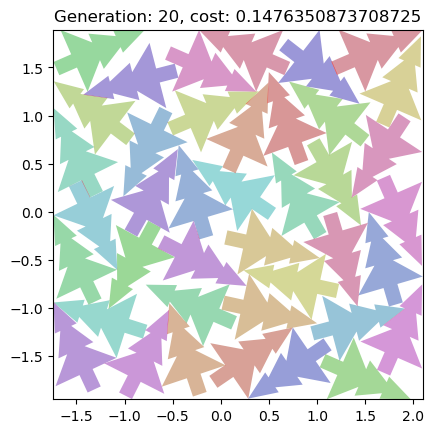

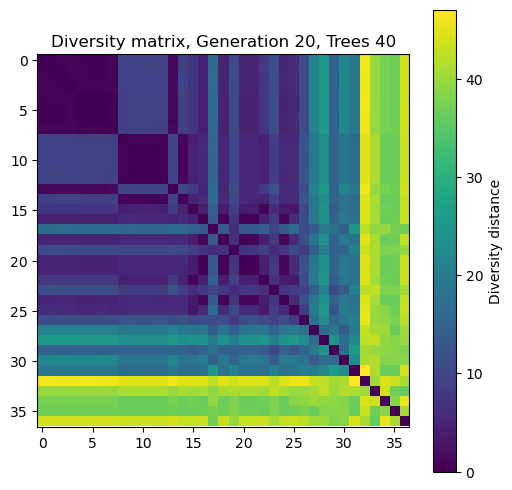

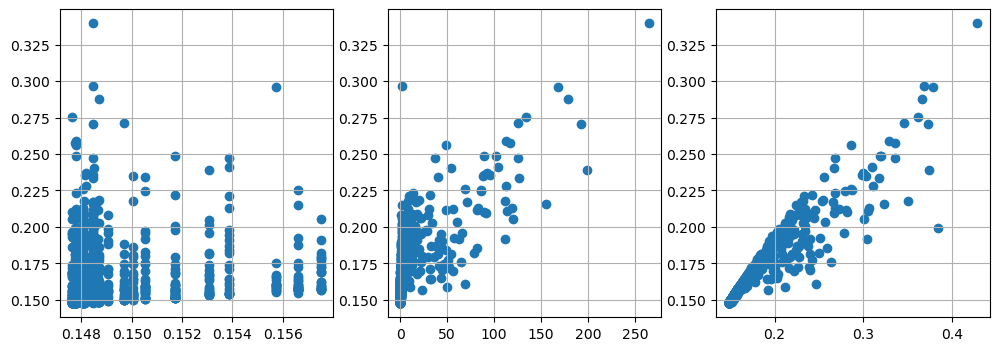

Generation 21, Trees 40, Best cost: 0.14763509, Est: 0.36908772, h: 3.825334


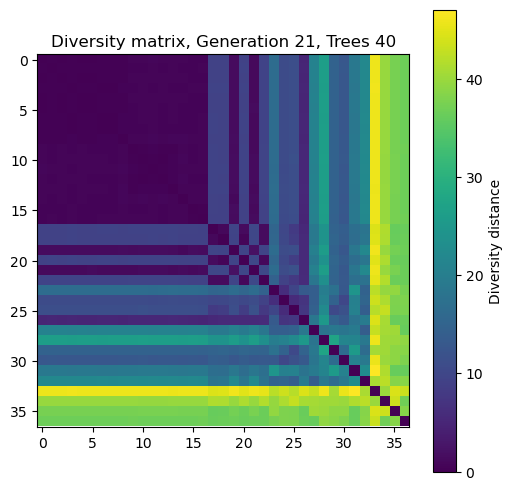

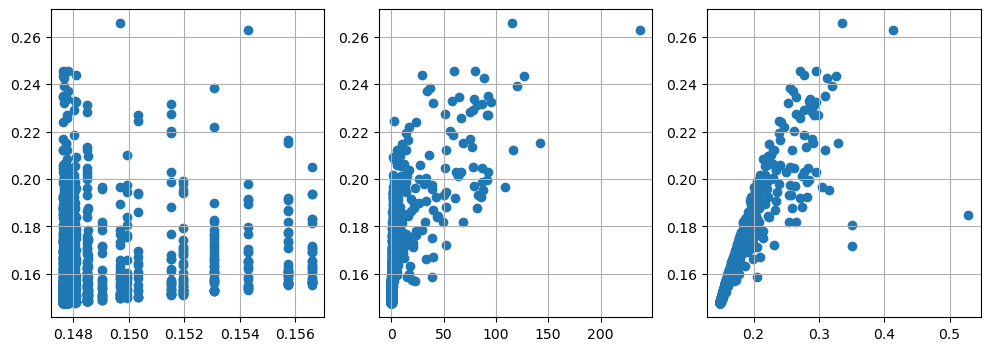

Generation 22, Trees 40, Best cost: 0.14763422, Est: 0.36908555, h: 3.825358


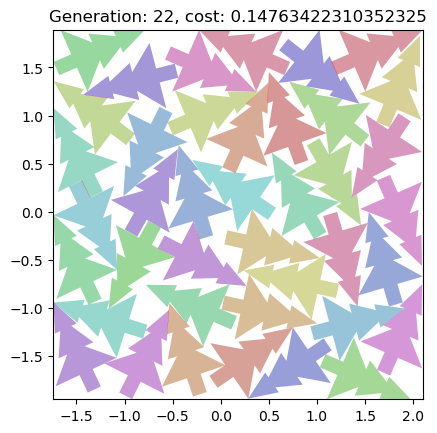

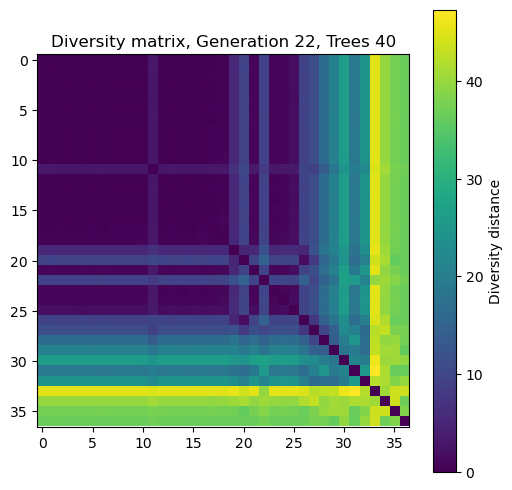

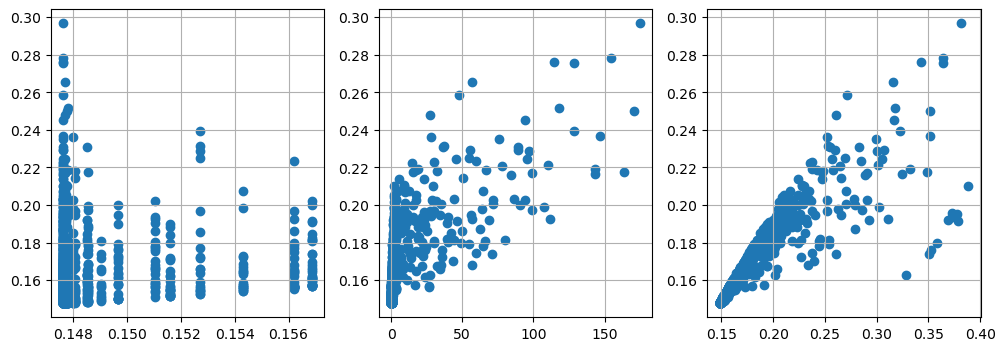

Generation 23, Trees 40, Best cost: 0.14763264, Est: 0.36908162, h: 3.824776


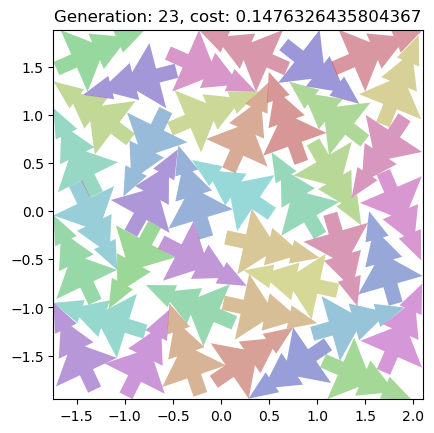

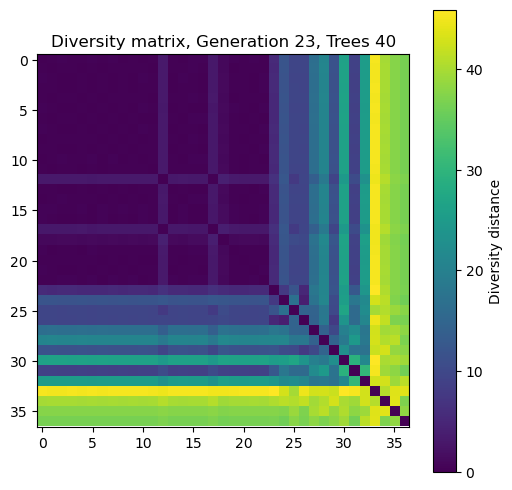

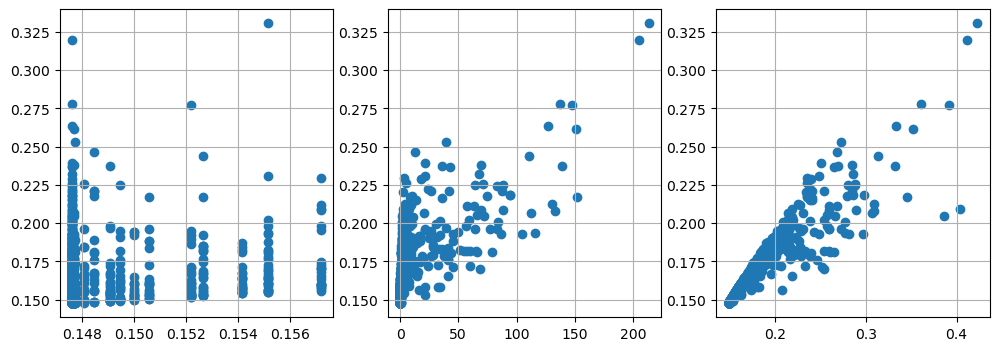

Generation 24, Trees 40, Best cost: 0.14753950, Est: 0.36884875, h: 3.821763


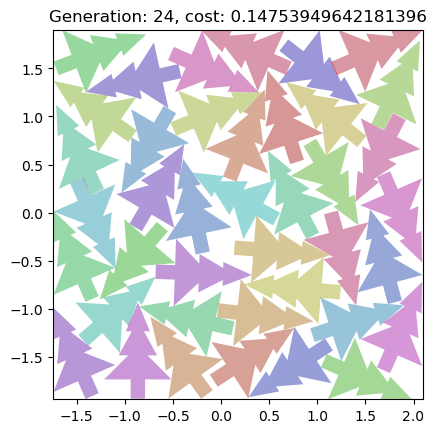

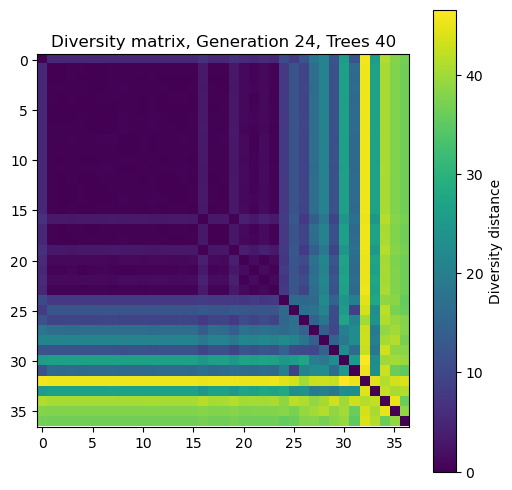

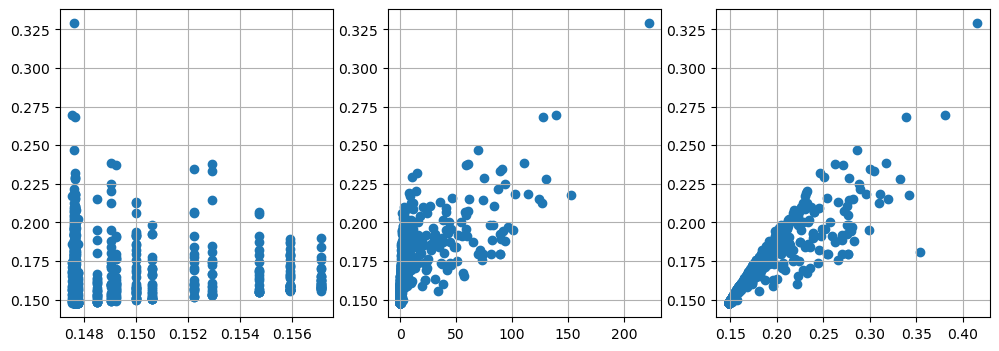

Generation 25, Trees 40, Best cost: 0.14753950, Est: 0.36884875, h: 3.821763


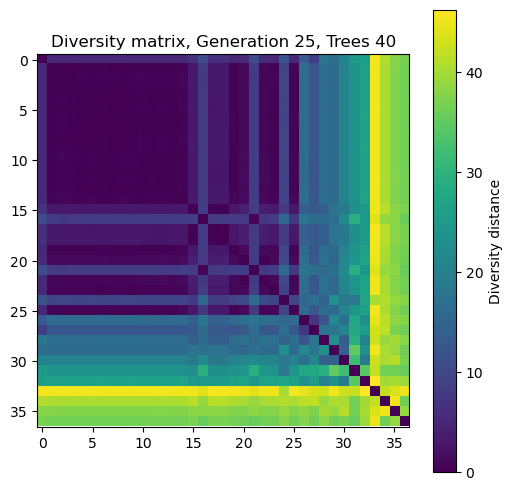

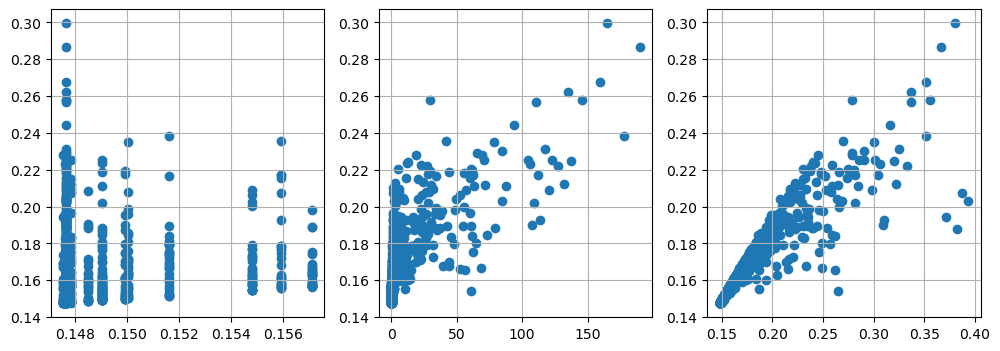

Generation 26, Trees 40, Best cost: 0.14741783, Est: 0.36854458, h: 3.819983


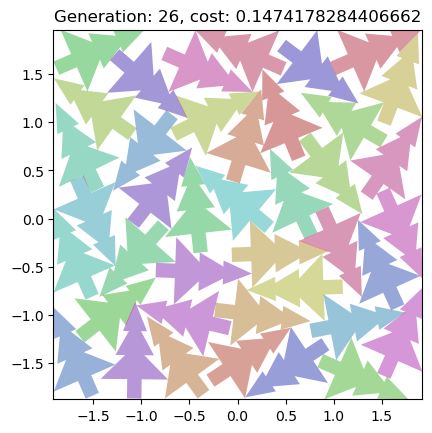

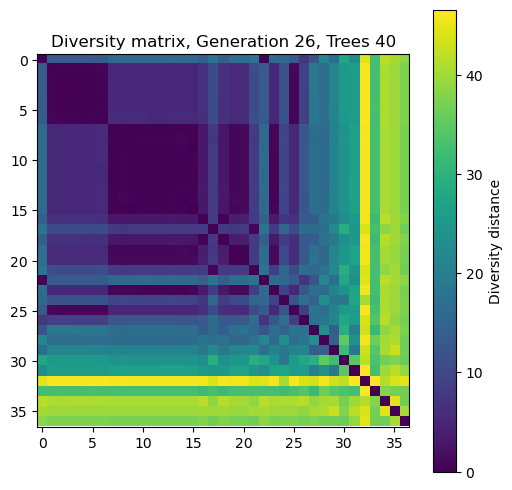

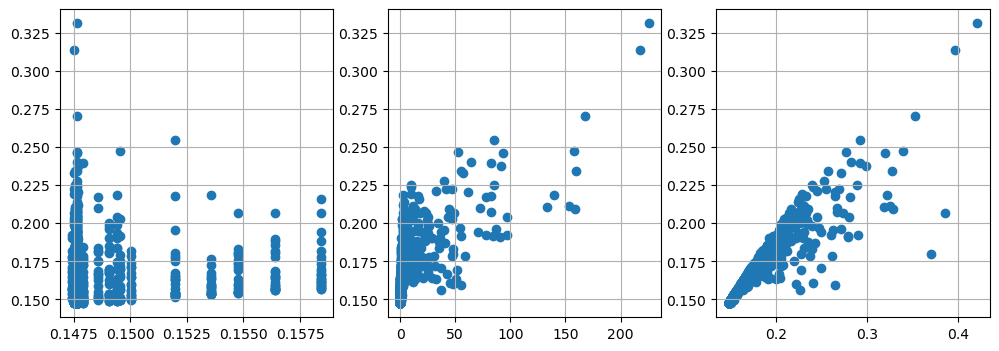

Generation 27, Trees 40, Best cost: 0.14741783, Est: 0.36854458, h: 3.819983


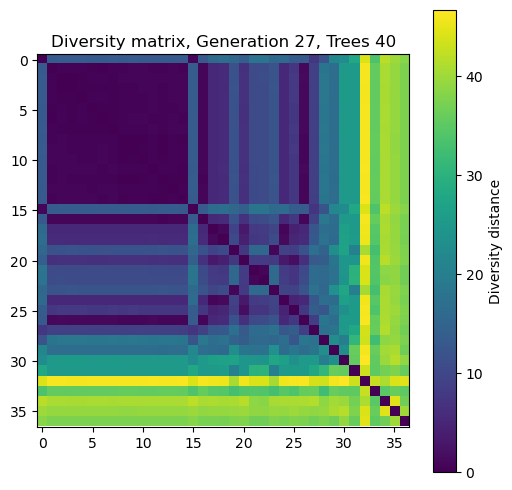

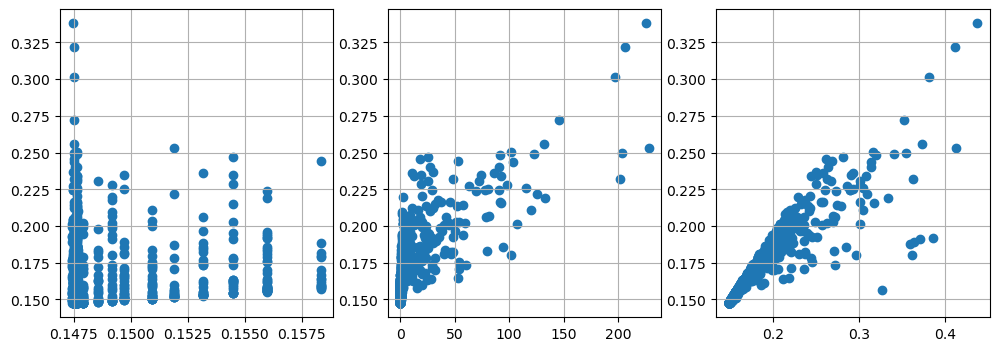

Generation 28, Trees 40, Best cost: 0.14741404, Est: 0.36853511, h: 3.819799


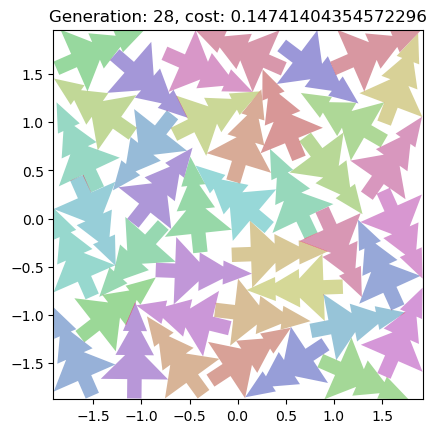

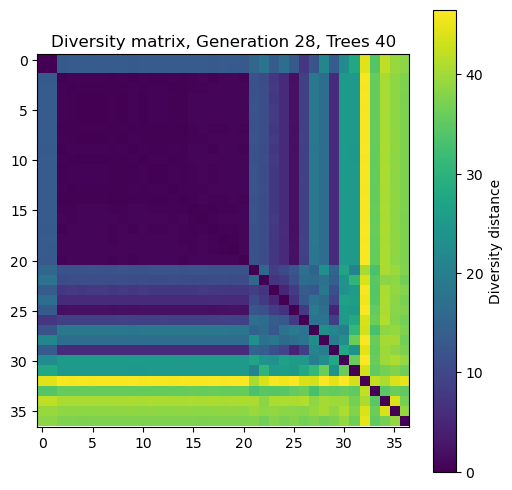

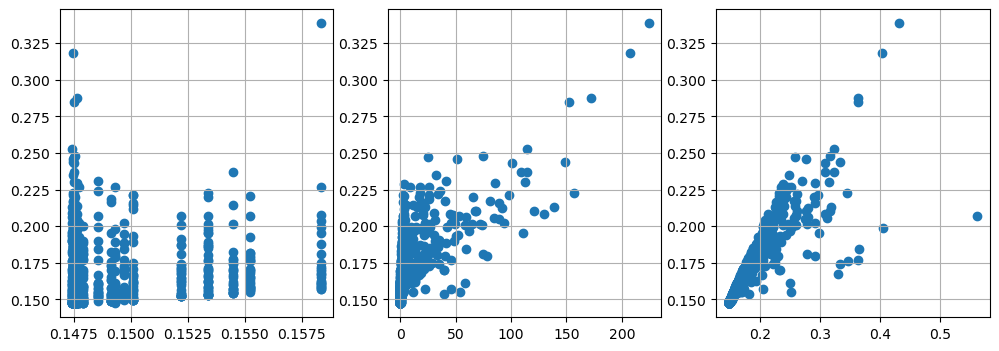

Generation 29, Trees 40, Best cost: 0.14740542, Est: 0.36851354, h: 3.819902


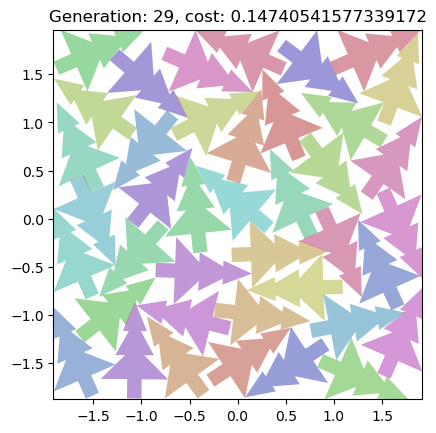

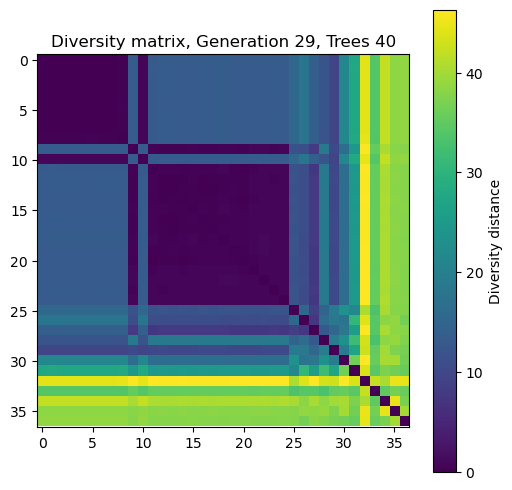

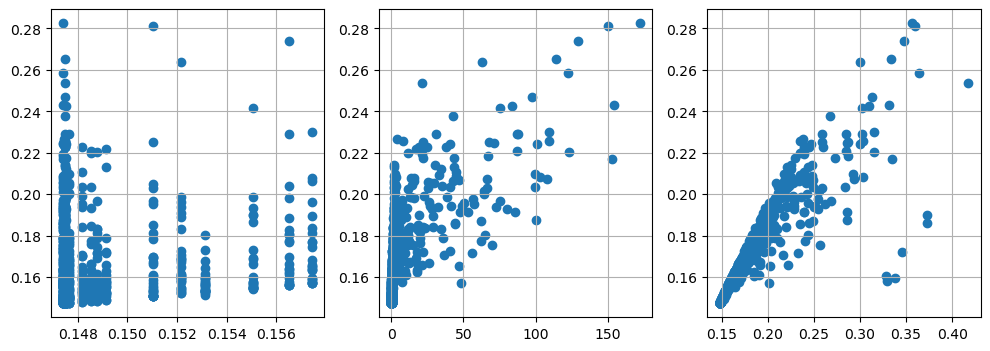

Generation 30, Trees 40, Best cost: 0.14740539, Est: 0.36851346, h: 3.819886


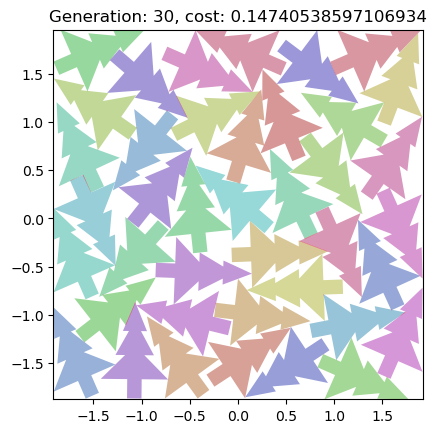

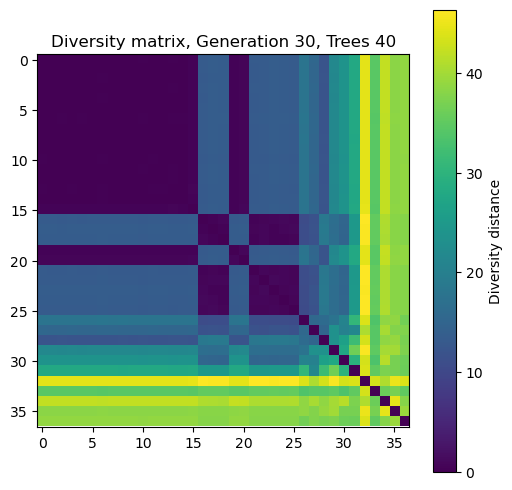

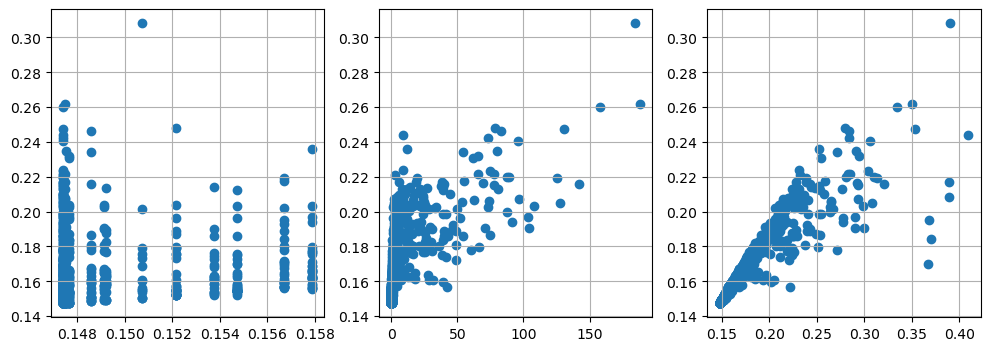

Generation 31, Trees 40, Best cost: 0.14740413, Est: 0.36851034, h: 3.819794


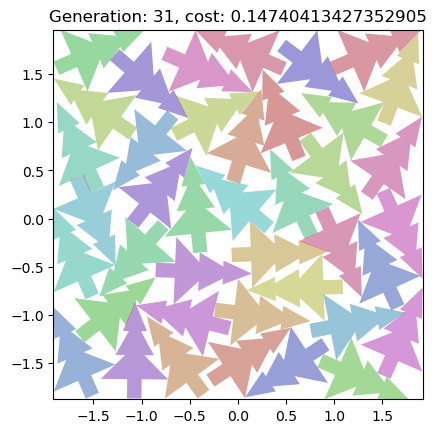

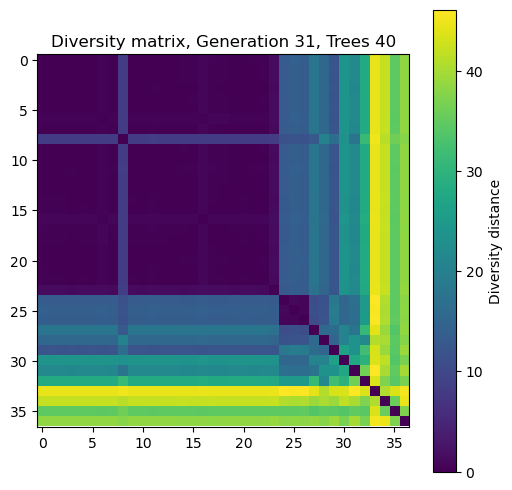

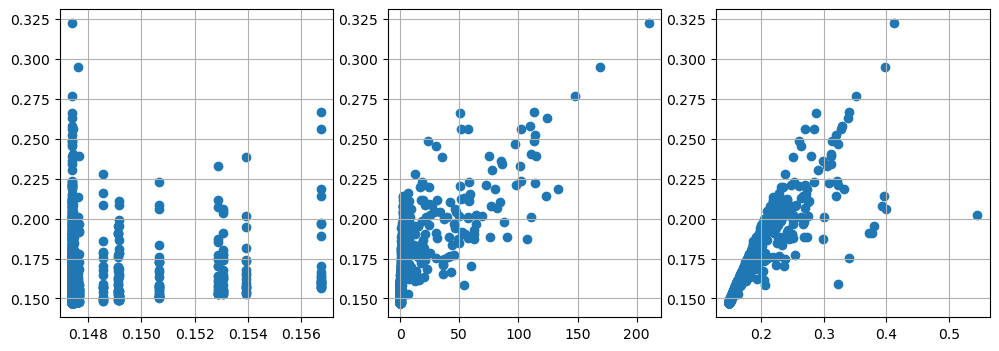

Generation 32, Trees 40, Best cost: 0.14700018, Est: 0.36750045, h: 3.815178


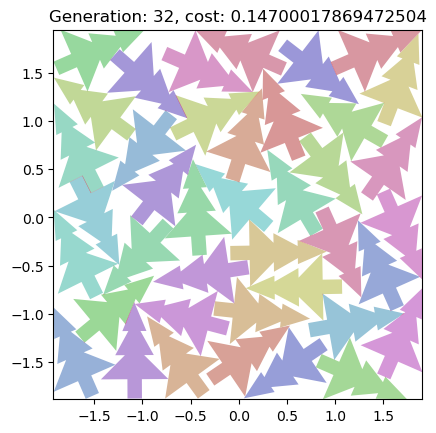

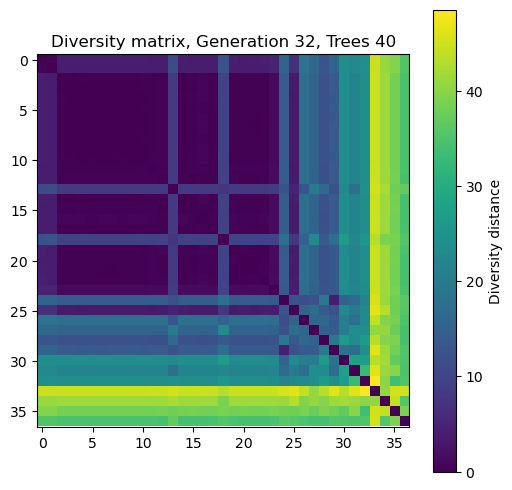

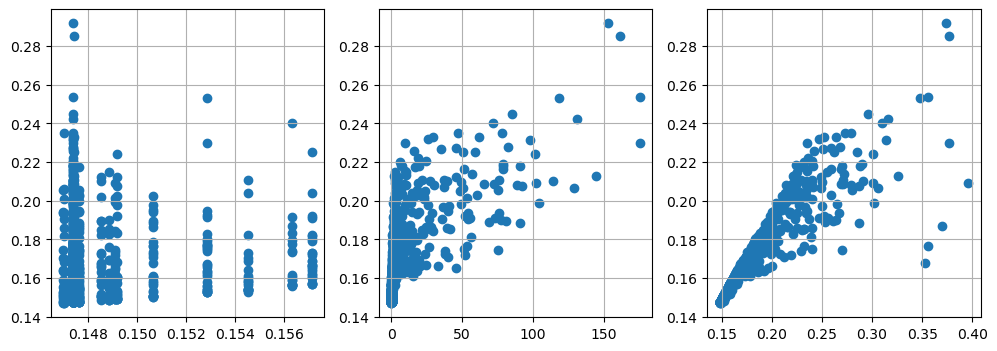

Generation 33, Trees 40, Best cost: 0.14699605, Est: 0.36749012, h: 3.815320


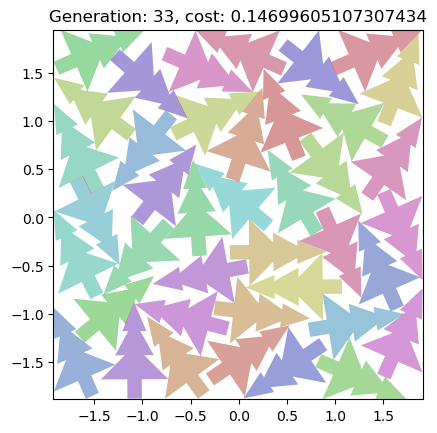

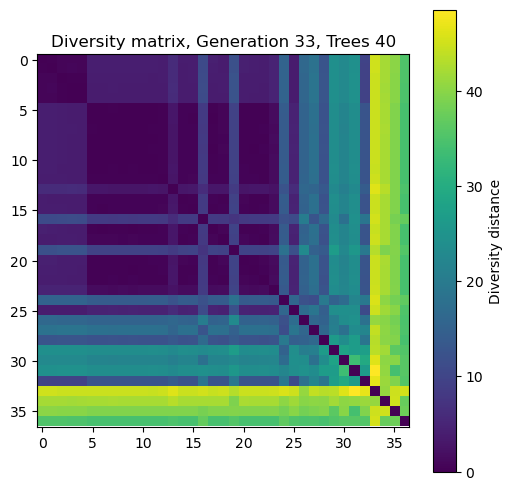

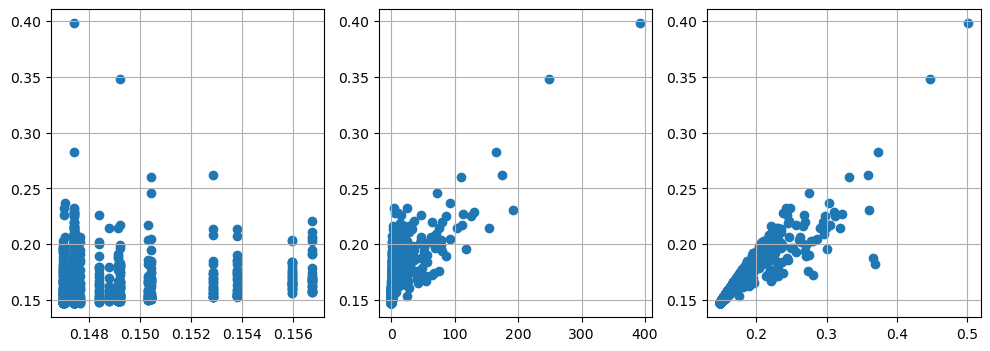

Generation 34, Trees 40, Best cost: 0.14698306, Est: 0.36745765, h: 3.815250


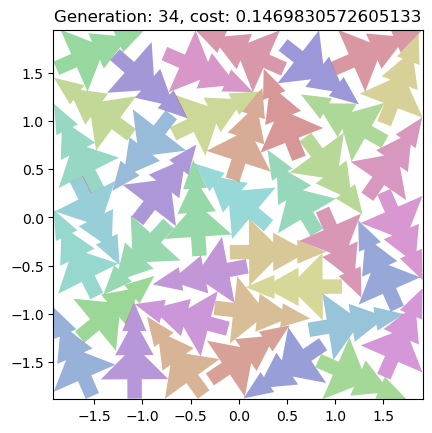

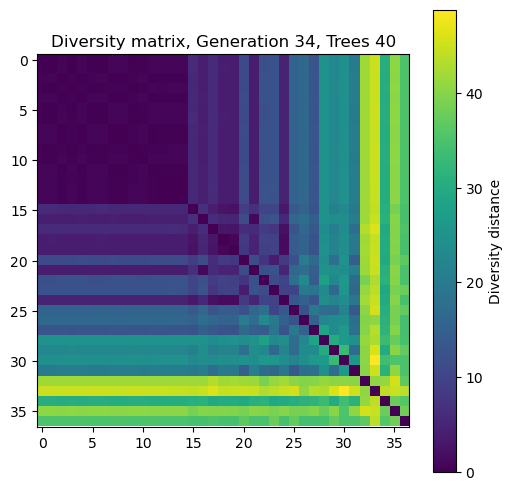

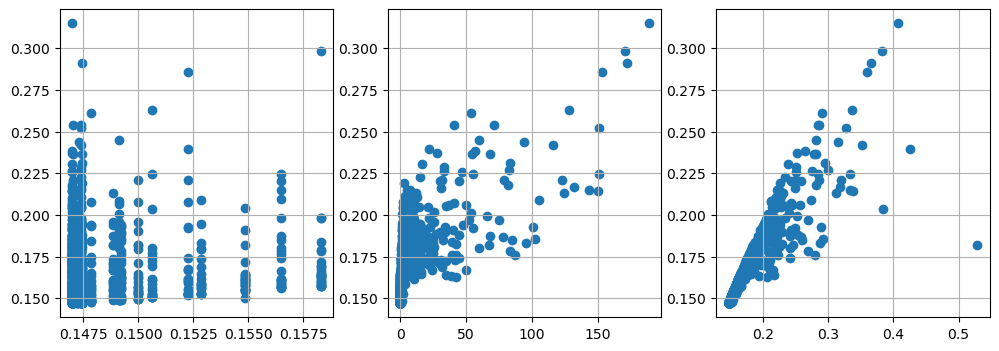

Generation 35, Trees 40, Best cost: 0.14698295, Est: 0.36745739, h: 3.815303


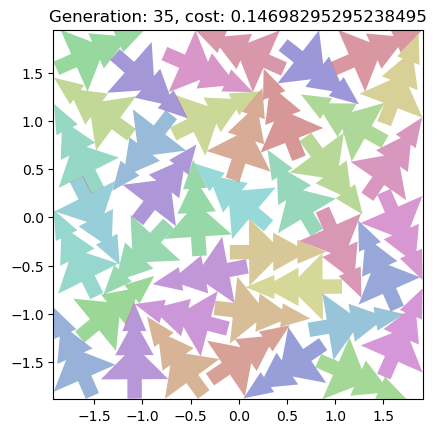

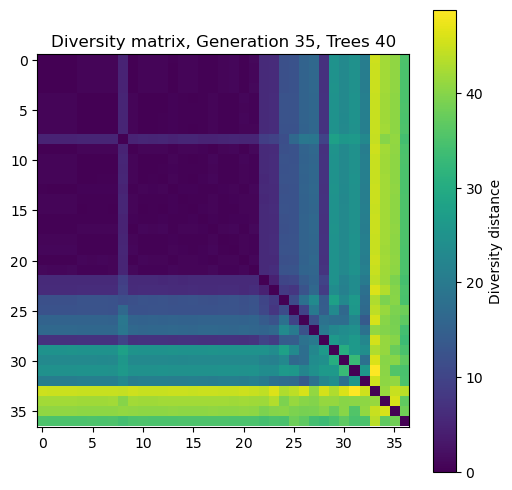

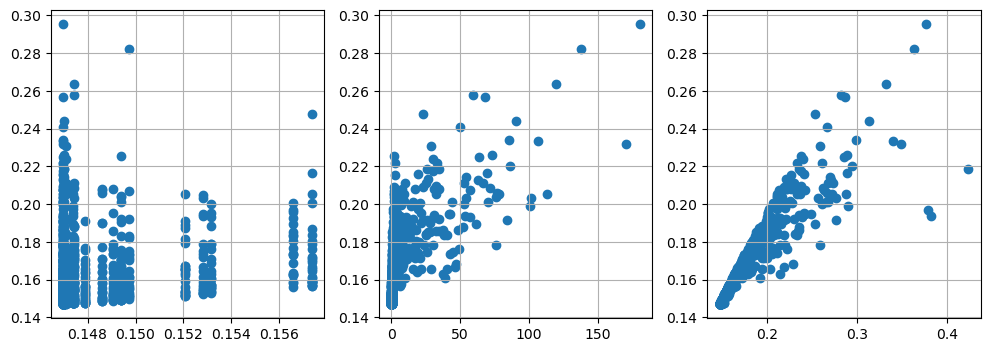

Generation 36, Trees 40, Best cost: 0.14698277, Est: 0.36745694, h: 3.815297


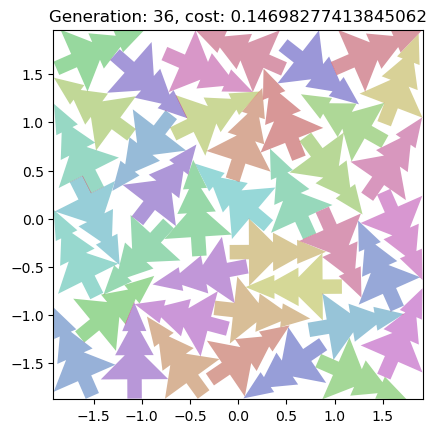

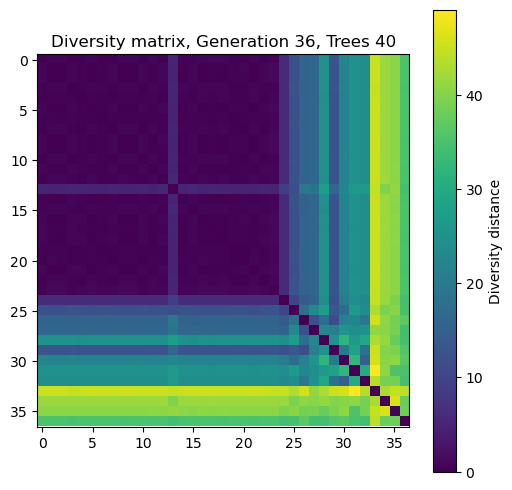

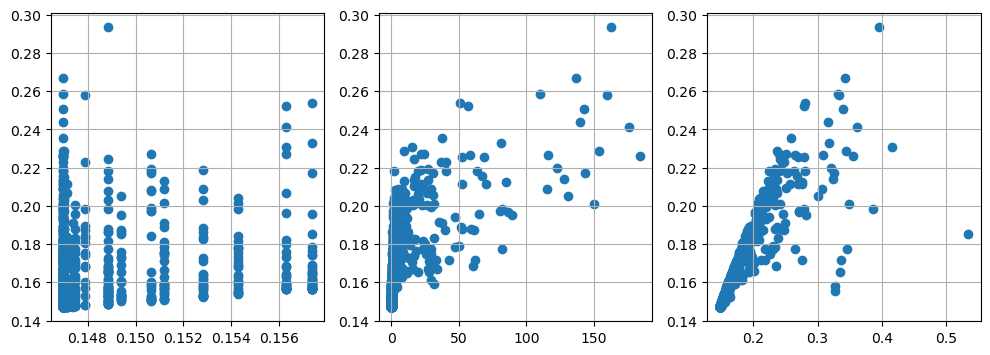

Generation 37, Trees 40, Best cost: 0.14693363, Est: 0.36733408, h: 3.814837


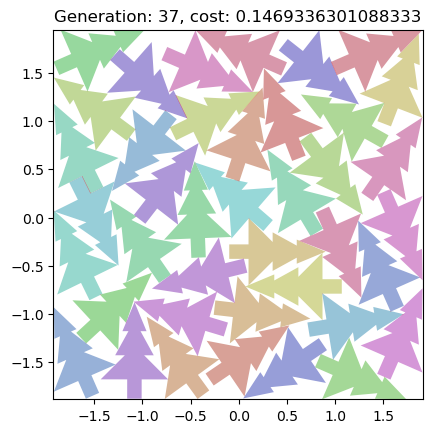

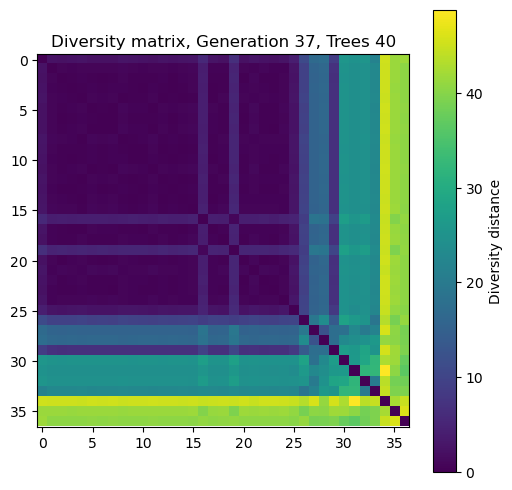

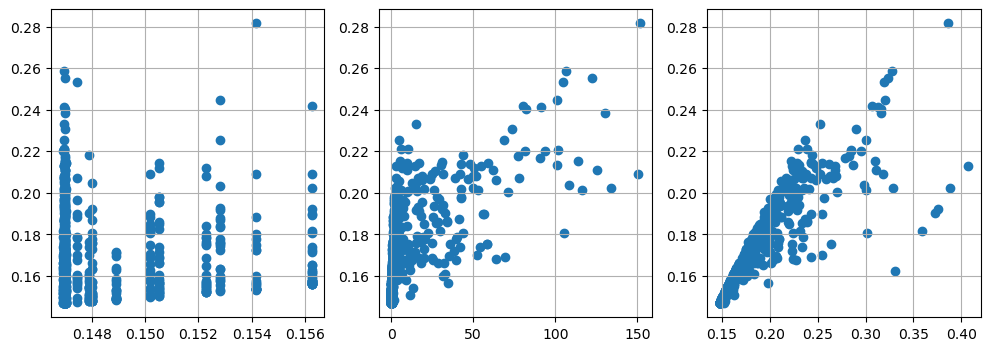

Generation 38, Trees 40, Best cost: 0.14685893, Est: 0.36714733, h: 3.813195


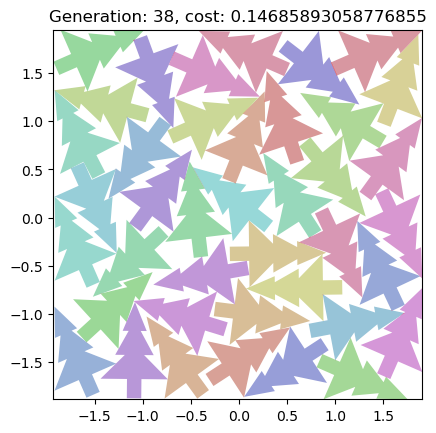

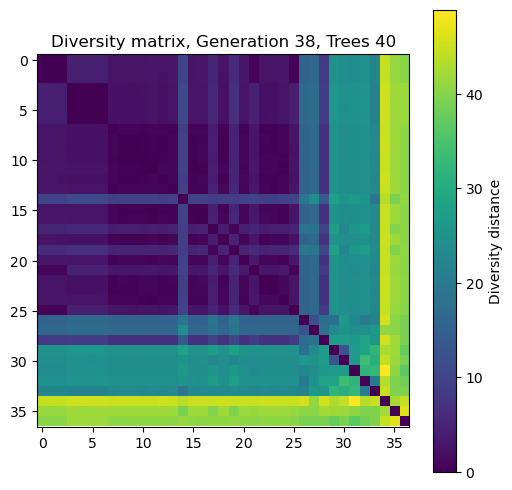

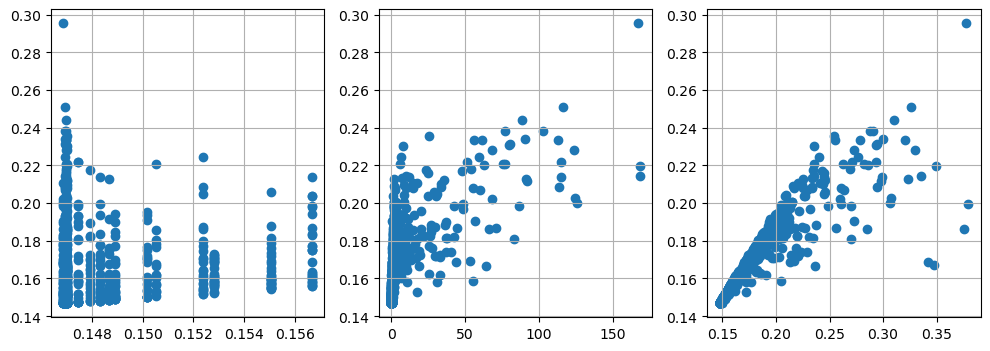

Generation 39, Trees 40, Best cost: 0.14682551, Est: 0.36706376, h: 3.812771


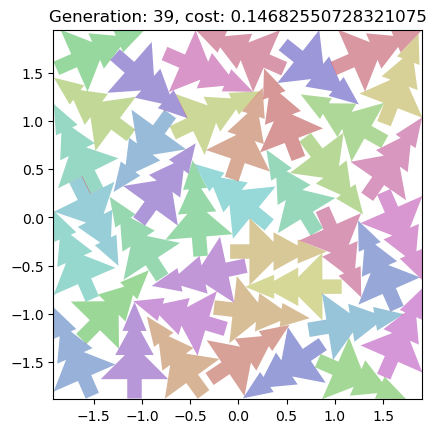

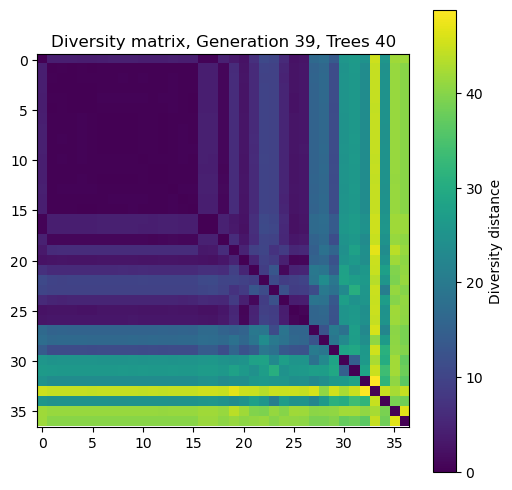

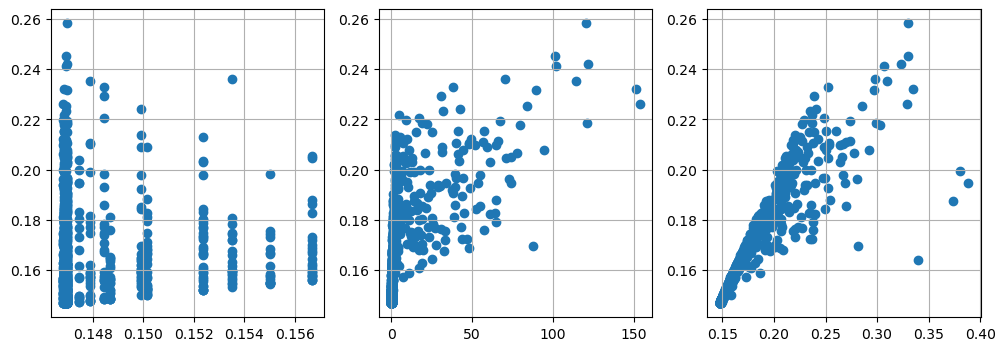

Generation 40, Trees 40, Best cost: 0.14682418, Est: 0.36706045, h: 3.812751


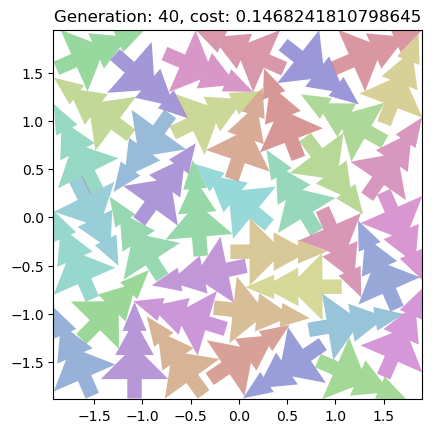

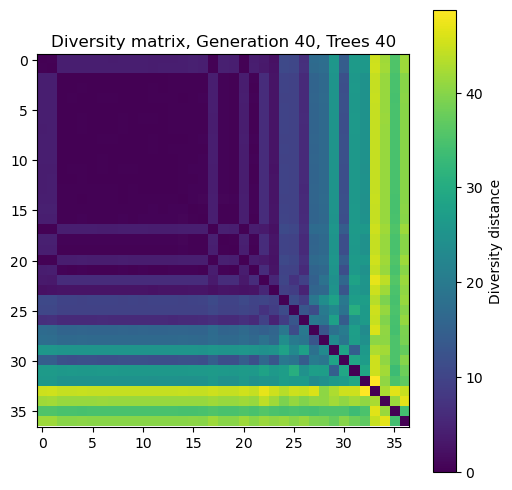

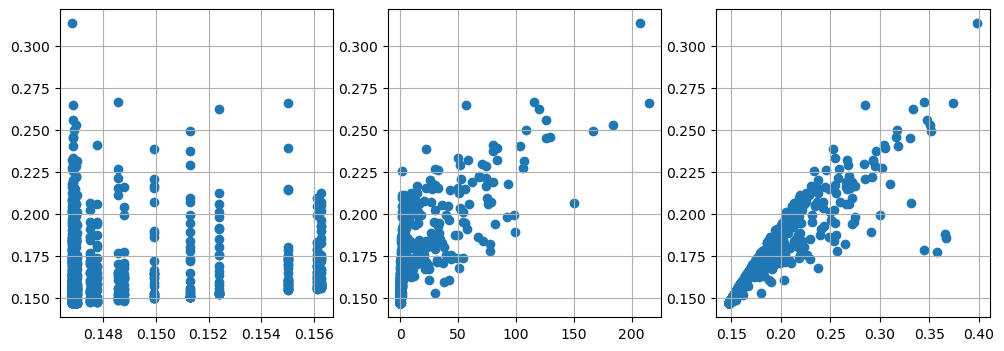

Generation 41, Trees 40, Best cost: 0.14680718, Est: 0.36701794, h: 3.812461


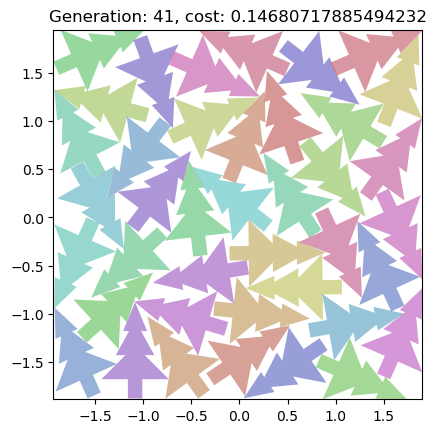

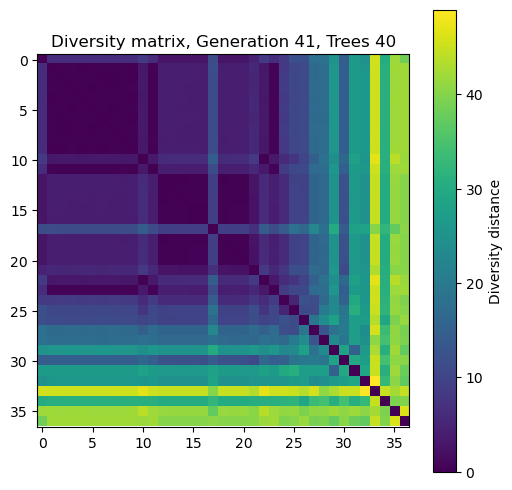

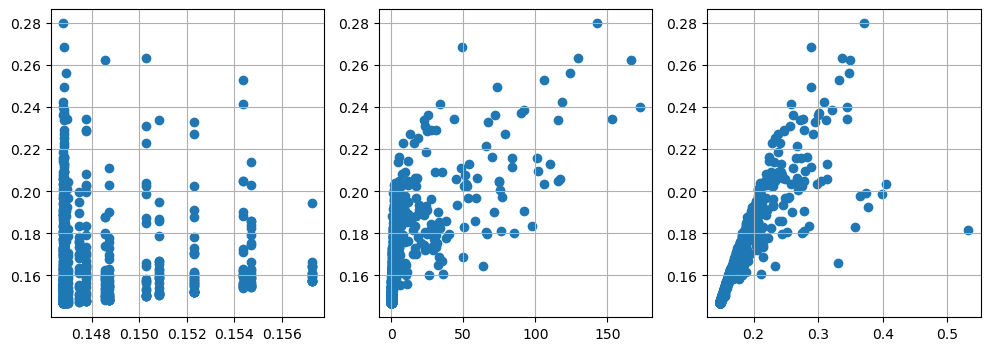

Generation 42, Trees 40, Best cost: 0.14679417, Est: 0.36698542, h: 3.811465


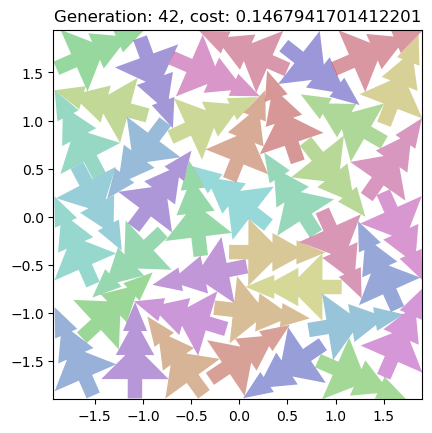

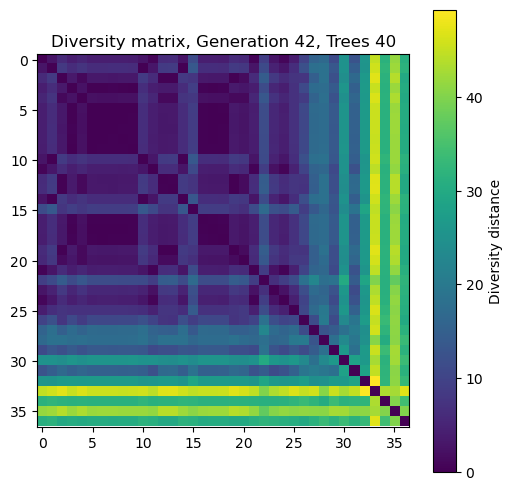

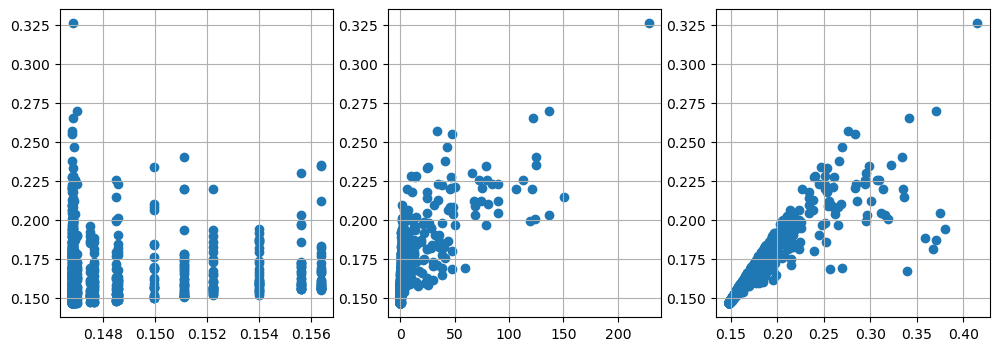

Generation 43, Trees 40, Best cost: 0.14666781, Est: 0.36666951, h: 3.808796


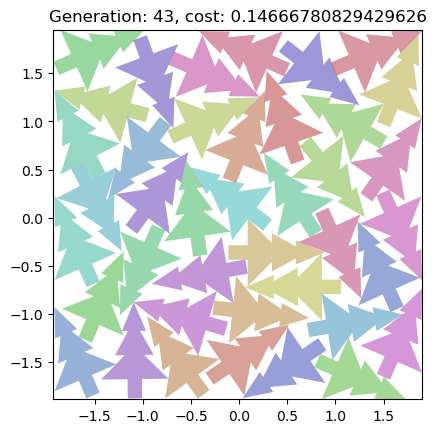

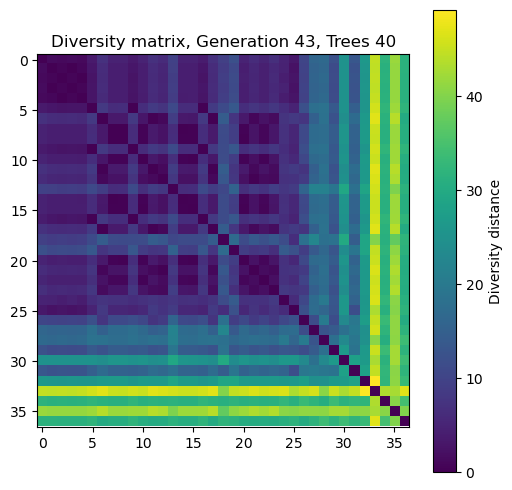

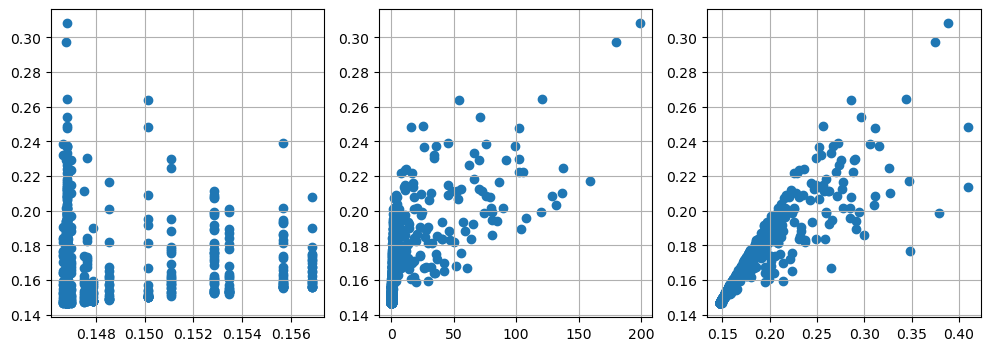

Generation 44, Trees 40, Best cost: 0.14655809, Est: 0.36639524, h: 3.808955


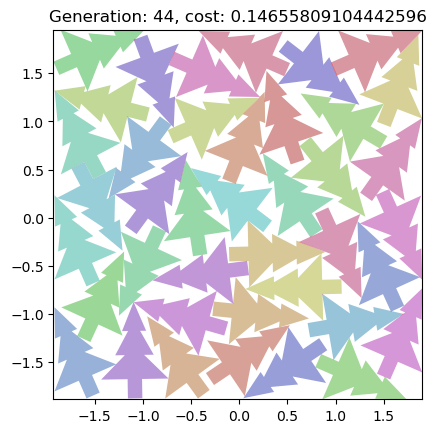

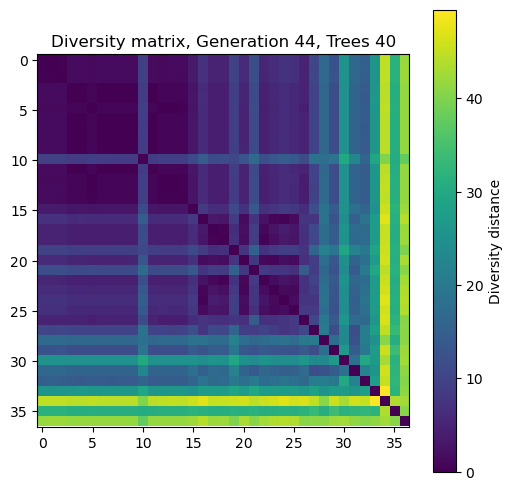

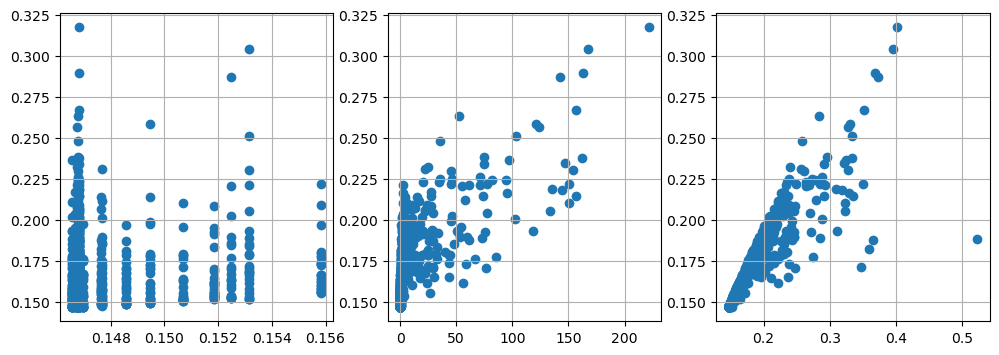

Generation 45, Trees 40, Best cost: 0.14655809, Est: 0.36639524, h: 3.808955


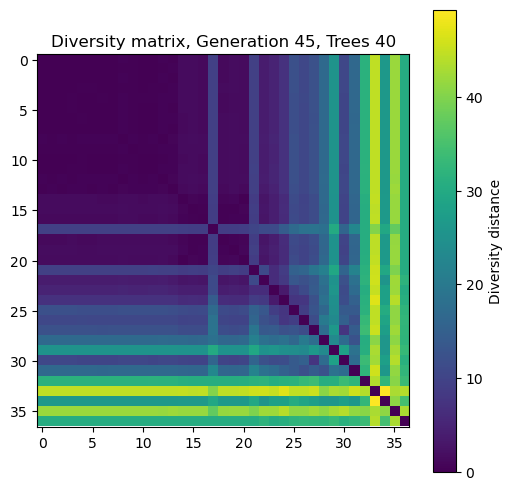

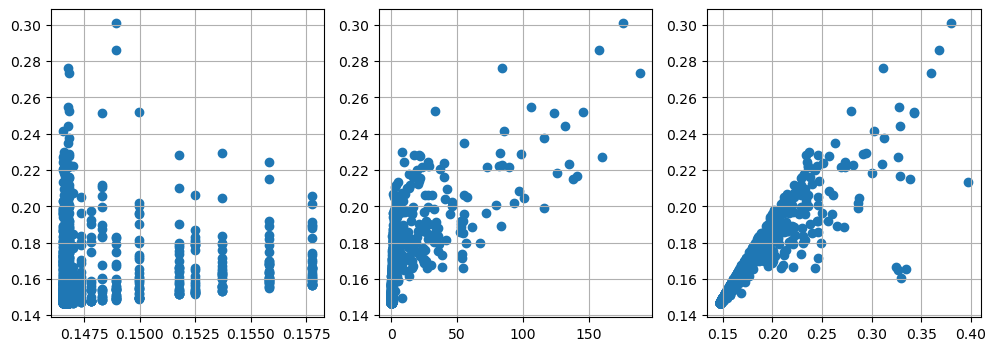

Generation 46, Trees 40, Best cost: 0.14655806, Est: 0.36639516, h: 3.808978


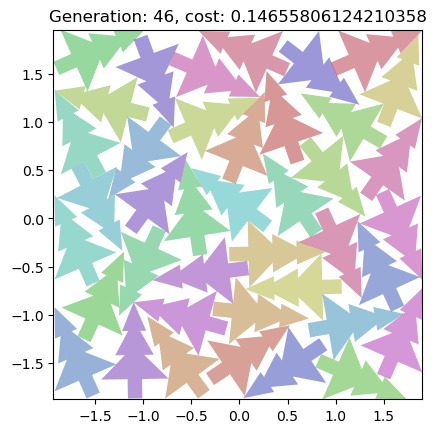

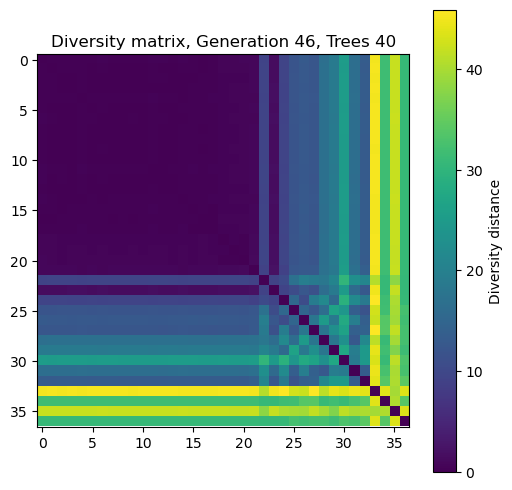

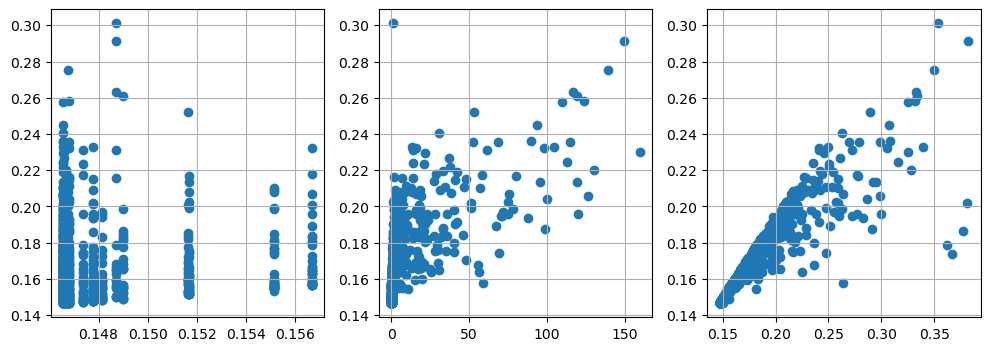

Generation 47, Trees 40, Best cost: 0.14655806, Est: 0.36639516, h: 3.808978


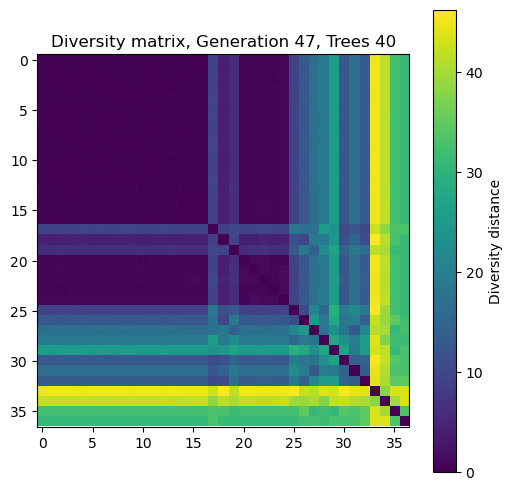

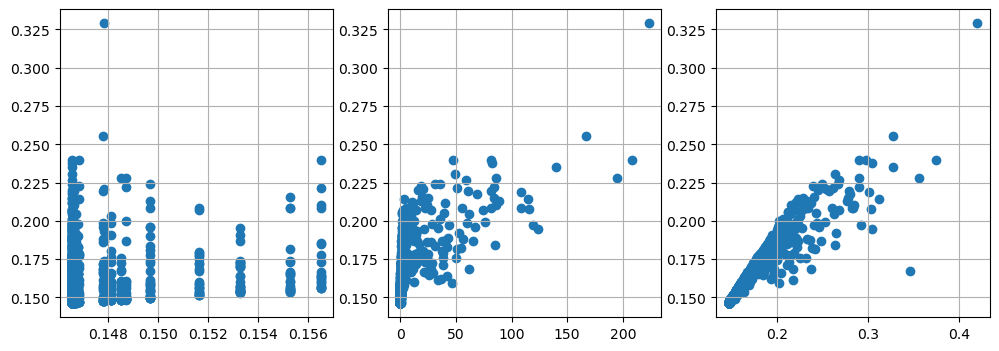

Generation 48, Trees 40, Best cost: 0.14621076, Est: 0.36552689, h: 3.804455


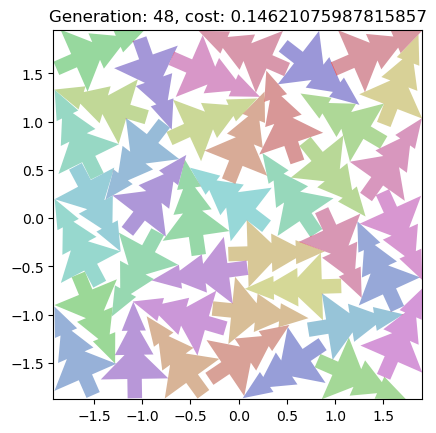

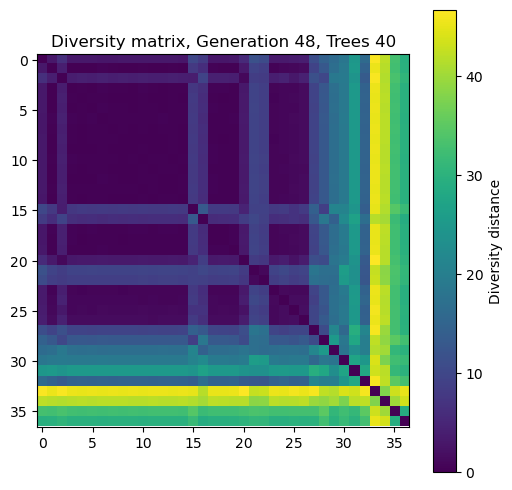

In [ ]:
importlib.reload(pack_ga)
fastMode = False
runner = pack_ga.GA()
runner.N_trees_to_do = np.array([10])
runner.plot_fitness_predictors = True
runner.plot_diversity_matrix = True
runner.n_generations = 300
if fastMode:
    runner.initializer.jiggler.duration_compact /= 10
    runner.initializer.jiggler.plot_interval = None
    runner.initializer.jiggler.n_rounds = 1    
    runner.rough_relaxers[0].n_iterations= 0
    runner.fine_relaxers = []
    runner.n_generations = 5
    runner.population_size = 100
    runner.selection_size = [1,2,5,10]
    kgs.debugging_mode = 2
kgs.profiling=False
runner.run()